# Customer Segmentation

# Table of Contents
1. [Problem Definition](#Problem-Definition)
2. [Importing Basic Libraries](#Importing-Basic-Libraries)
3. [Loading Dataset](#Loading-Dataset)
4. [EDA (Exploratory Data Analysis) and Feature Engineering](#Exploratory-Data-Analysis-and-Feature-Engineering)
5. [Model Training](#Model-Training)
6. [Cluster Interpretation](#Cluster-Interpretation)
7. [Conclusion](#Conclusion)

# Problem Definition

In today's retail and e-commerce industries, understanding customer purchasing behavior is crucial for businesses to optimize their sales strategies, improve customer retention, and increase profitability. However, analyzing large amounts of transaction data manually is inefficient. To address this, machine learning techniques, particularly unsupervised clustering algorithms, can help uncover meaningful customer segments based on purchasing patterns.

# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading Dataset

In [2]:
df = pd.read_excel('customer_data.xlsx')

The dataset used in this project is sourced from **Kaggle's Customer Segmentation Dataset** and contains **541,909 records of transactions**. It includes the following features:  

- **InvoiceNo** – A unique identifier for each transaction  
- **StockCode** – A unique identifier for each product  
- **Description** – The name of the product
- **Quantity** – The number of units purchased in the transaction  
- **InvoiceDate** – The date and time of the transaction  
- **UnitPrice** – The price of a single unit of the product  
- **CustomerID** – A unique identifier for each customer
- **Country** – The country from which the customer made the purchase  

# Exploratory Data Analysis and Feature Engineering

### Data Summary

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The CustomerID column is currently of type float64. This is misleading because customer IDs should be treated as unique identifiers rather than numeric values that can be ordered or subjected to mathematical operations. Converting CustomerID to a string type ensures that it behaves as a categorical identifier and avoids creating an artificial numerical order.

In [7]:
# Convert CustomerID to string, but make sure NaN remains as NaN
df['CustomerID'] = df['CustomerID'].apply(lambda x: str(x) if pd.notna(x) else np.nan)

len(df['CustomerID'].unique())

4373

### Handling Duplicates

In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.head()

Number of duplicate rows: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [9]:
duplicate_rows_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,5268.0,5268.0,5268,5268.000000,5268,5268.000000,5225,5268
unique,1933.0,1706.0,1732,NaN,NaN,NaN,960,14
top,555524.0,21034.0,REX CASH+CARRY JUMBO SHOPPER,NaN,NaN,NaN,12748.0,United Kingdom
freq,34.0,55.0,55,NaN,NaN,NaN,183,5178
mean,NaN,NaN,NaN,2.647684,2011-07-24 05:19:06.799544576,2.416667,NaN,NaN
min,NaN,NaN,NaN,-1296.000000,2010-12-01 11:45:00,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,2011-04-03 15:07:00,0.950000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,2011-09-12 13:29:30,1.650000,NaN,NaN
75%,NaN,NaN,NaN,2.000000,2011-11-09 12:52:00,2.950000,NaN,NaN
max,NaN,NaN,NaN,1440.000000,2011-12-09 11:34:00,19.950000,NaN,NaN


In this dataset, there are duplicate rows where the same product (same StockCode), same customer (CustomerID), and same transaction time (InvoiceDate) appear multiple times. Since it's highly unlikely for a customer to buy the exact same item at the exact same time (especially given the InvoiceDate column), these duplicates are most likely the result of data collection errors.

We will remove these duplicates to ensure the integrity of our dataset. By doing so, we will focus only on the valid and unique transactions for analysis.

In [10]:
df = df.drop_duplicates()

df.shape

(536641, 8)

### Handling Missing Values

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


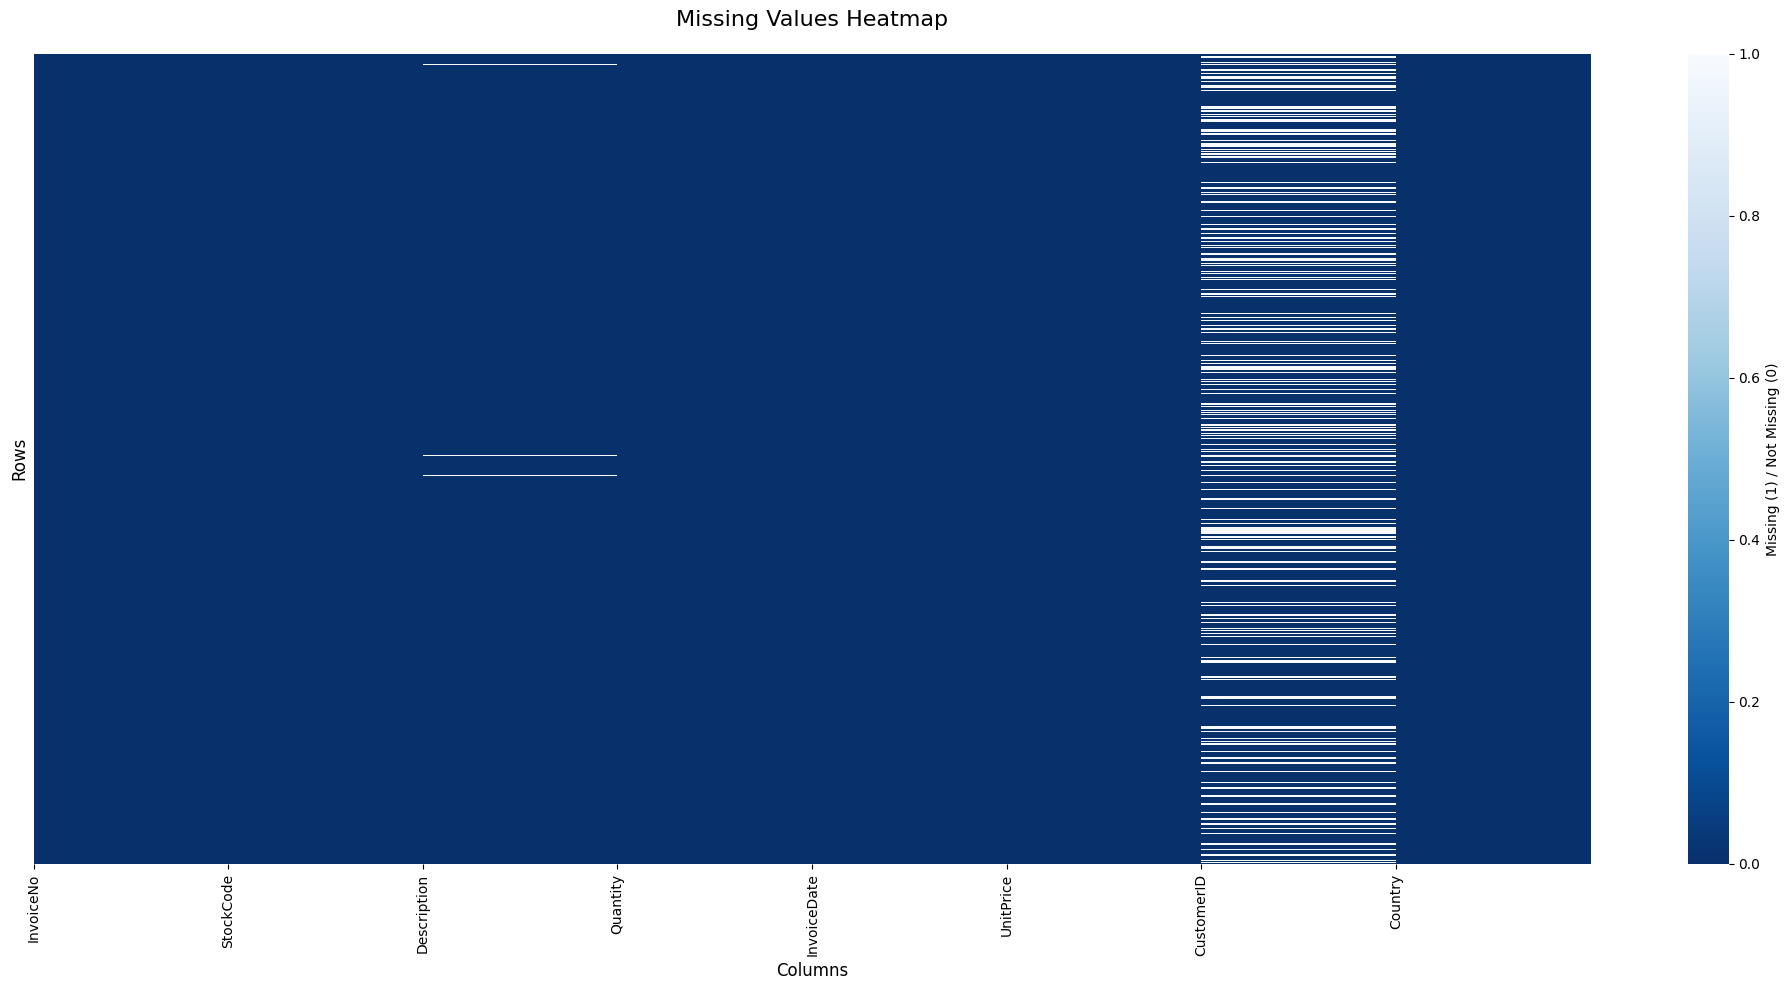

In [12]:
missing_matrix = df.isnull().astype(int)

plt.figure(figsize=(20, 10))

sns.heatmap(
    missing_matrix, 
    cmap='Blues_r',
    cbar_kws={'label': 'Missing (1) / Not Missing (0)'},
    yticklabels=False
)


plt.title("Missing Values Heatmap", fontsize=16, pad=20)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.xticks(range(len(df.columns)), df.columns, rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

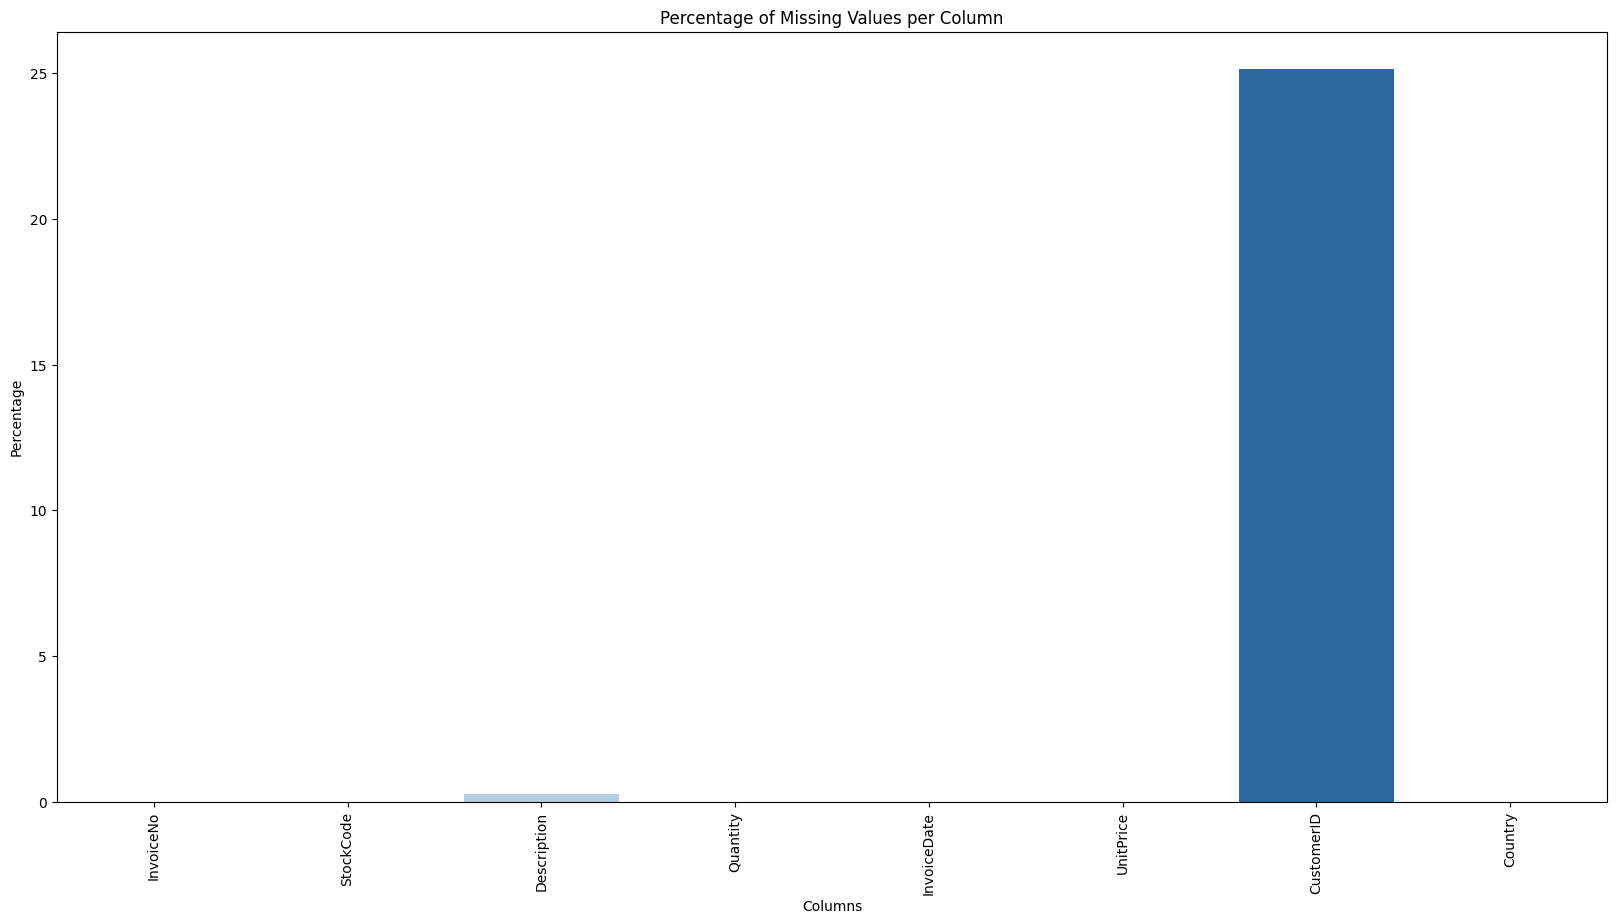

In [13]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(20, 10))
sns.barplot(x=missing_percentage.index, y=missing_percentage, hue=missing_percentage.index, palette='Blues', legend=False)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.show()

Since CustomerID is a critical feature for customer segmentation, If a transaction has no associated CustomerID, it might not make sense to keep that record for clustering purposes.

In [14]:
df = df[df['CustomerID'].notna()]
df.shape

(401604, 8)

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


After removing the rows with null CustomerID, the missing values in the Description column disappeared. This suggests that the rows without a valid CustomerID were the ones contributing to the missing Description values.

### Detecting and Handling Outliers

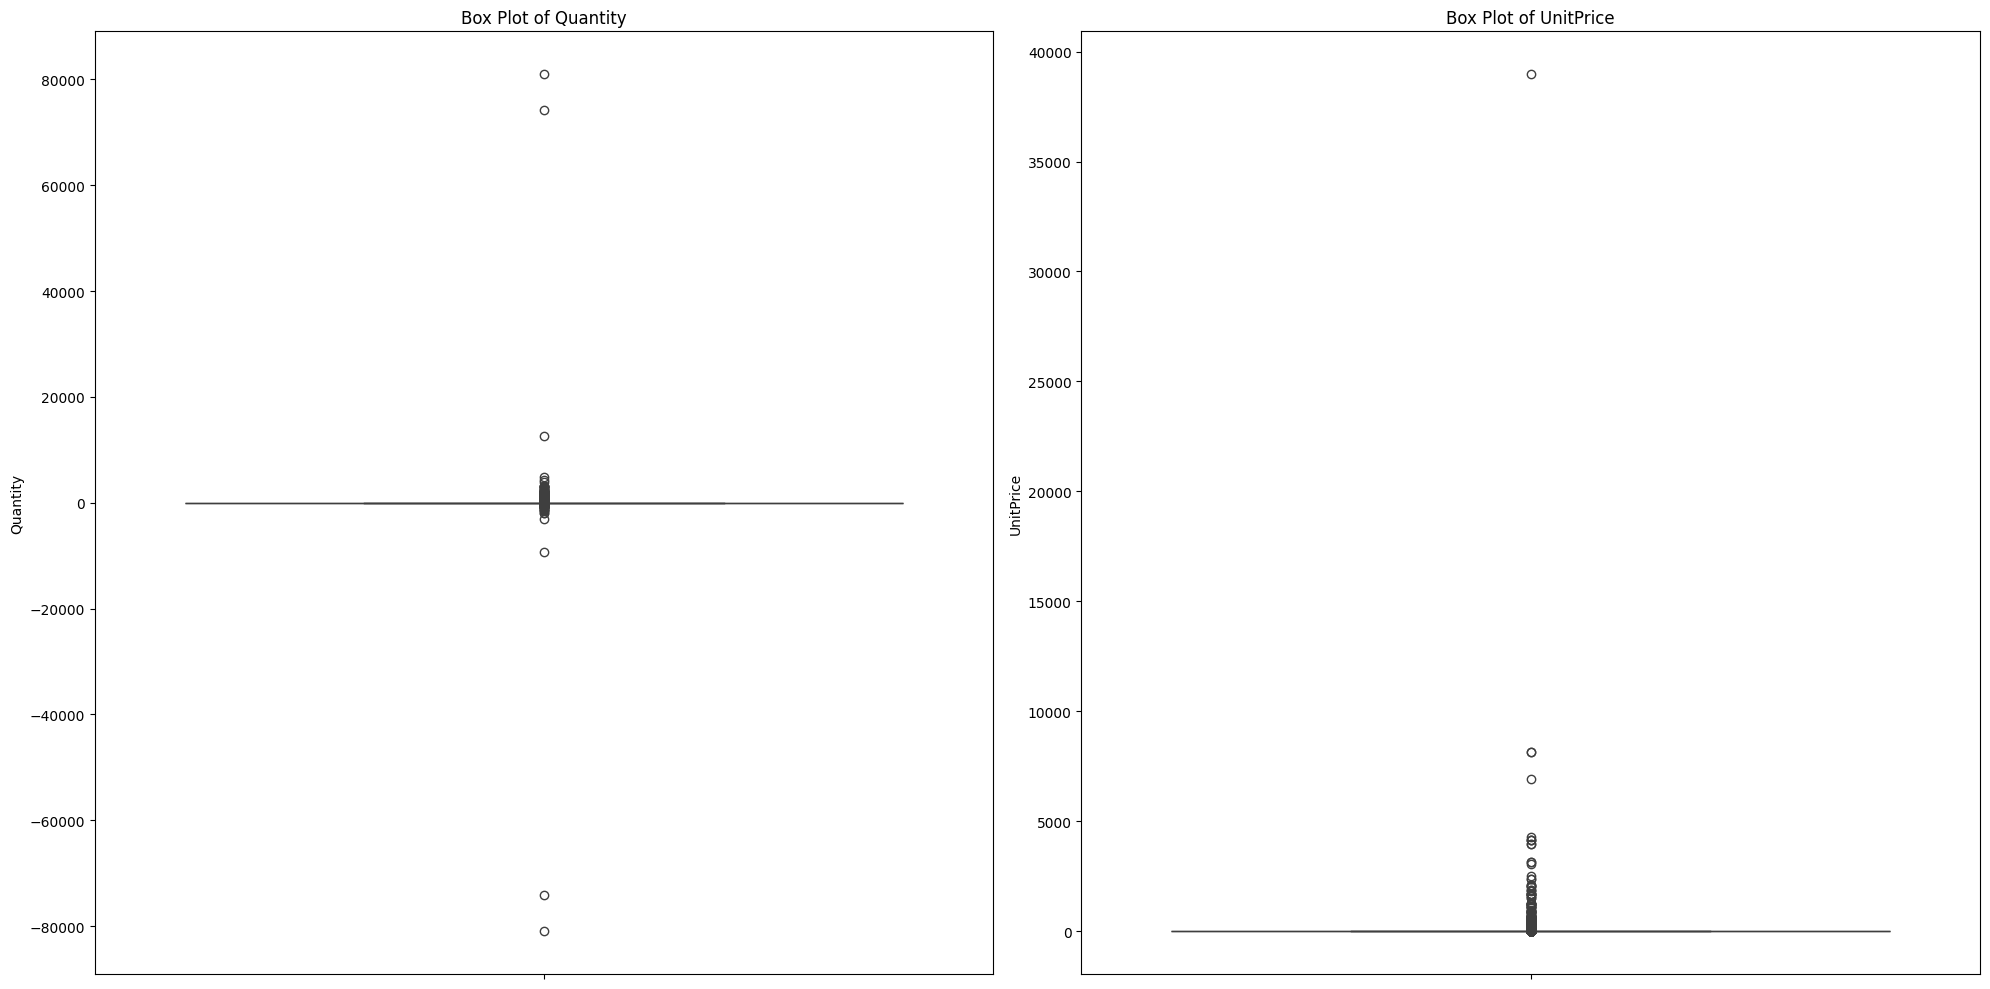

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column], palette=['C0'])
    
    # Add title and labels
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel('', fontsize=10)
    plt.ylabel(column, fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [17]:
negative_values = df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]

In [18]:
negative_values.shape

(8872, 8)

This DataFrame will contain only valid rows, where both Quantity and UnitPrice are greater than or equal to zero

In [19]:
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]
df.shape

(392732, 8)

In [20]:
from scipy.stats import zscore

def detect_outliers_zscore(column, threshold=3):
    z_scores = zscore(column)
    outliers = column[np.abs(z_scores) > threshold]
    return outliers

outlier_counts = {}
for column in numerical_columns:
    outliers = detect_outliers_zscore(df[column])
    outlier_counts[column] = len(outliers)
    print(f"Number of outliers in {column}: {len(outliers)}")

for column, count in outlier_counts.items():
    if count > 0:
        print(f"Outliers in {column}: {detect_outliers_zscore(df[column]).values}")

Number of outliers in Quantity: 387
Number of outliers in UnitPrice: 221
Outliers in Quantity: [  600   600  1824  2880  1400  1440   720   972   972  1008  1008   600
   600  1000  1488  1394  1728   576  2400   576   720   960  1296   600
   720   600   576   600   600   860  1010  1356  1284   600   576  1930
  2000  3114  1300   670   648 74215   720  1440   720   720   576   900
   600  2592   800  1200   864  1296  1296  1296  2400  1056  1500   600
  2400   600  3906   600  1152  1200   576  1152   864   576   864   600
   600   768   576   576   720   600   700   900   800  1200   720   600
   600   576   720  1296  2160   576   576  1000   600   640   640   720
  1440   600   600   864  1200  1152   864  1152   576   864  1200  1056
  1728   600   600   576   576   576   576   576   576   576  1930  1300
   670  2000  3114   960   960   720   960   960  1008   600  1200  1200
  1152   600   600  2000   600  1350  1200   576   576   600   600   576
   576   576   600   720   60

Since some extreme values might still be valid, increasing the threshold will help ensure that we only remove values that are too far from the rest of the data, leaving real outliers intact.

In [21]:
for column in numerical_columns:
    z_scores = zscore(df[column])
    df = df[np.abs(z_scores) <= 5]

df.shape

(392417, 8)

### Feature Engineering

The **RFM model** is a widely used framework in marketing and customer segmentation that focuses on three key metrics to evaluate customer behavior and value. These three metrics—**Recency (R), Frequency (F), and Monetary (M)**—are used to segment customers based on their purchasing patterns, which helps businesses target the right customers with personalized strategies

Now that the df is cleaned, we handle the original dataset and create a new DataFrame specifically for clustering. This approach ensures that our clustering algorithm works optimally with transformed data, but we can still interpret and analyze the clusters in terms of the original, cleaned features.

In [472]:
df_rmf = df.copy()

df_rmf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In the dataset, the InvoiceNo column is based on the user and the time of purchase. If a customer buys multiple items at the same time, all of these items will share the same invoice ID. While InvoiceNo is valuable in identifying individual purchases, it does not provide insights into how frequently a customer buys across different instances.

Frequency is one of the key features in customer segmentation. This feature tracks how often a customer has made a purchase over a given time period. A higher frequency means that the customer is more likely to engage with the company or brand.

In this case, we calculate Frequency by counting the number of unique invoices a customer has made. This approach effectively captures how frequently a customer has interacted with the company. It can help us to:

- Identify loyal customers (those who frequently make new purchases).
- Distinguish customers based on how often they come back to buy, not just how much they buy in a single transaction.
- Better understand customer behavior over time, which is a key factor in segmentation for targeted marketing or sales strategies.

In [473]:
df_rmf['frequency'] = df_rmf.groupby('CustomerID')['InvoiceNo'].transform('nunique')

df_rmf.head(-5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,34
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34
...,...,...,...,...,...,...,...,...,...
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,4
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,4
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,4
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,4


To better understand the value of a purchase, it's essential to not only consider the quantity of items bought but also their unit price. The Monetary feature is one of the most important in customer segmentation, as it provides insight into how much money a customer has spent over a certain period.

The Monetary feature is calculated by multiplying the Quantity (number of items bought) by the UnitPrice (price of each item), giving us the total amount spent per transaction. After that, we aggregate this information at the customer level by summing the total amount spent by each customer.

- Understand purchase behavior: The total amount spent by a customer on each transaction reflects their spending habits. This helps identify customers who may make frequent, smaller purchases versus those who make fewer, larger purchases.

- Segment based on monetary value: By understanding how much customers spend, we can segment them based on high versus low spenders. This helps differentiate between customers who buy cheap items in bulk and those who purchase expensive items in smaller quantities.

- Enhance customer profiling: Knowing the total value of each purchase allows for more accurate profiling, helping businesses categorize customers as high-value or low-value shoppers. This can aid in targeted marketing efforts, product recommendations, and loyalty programs.

In [474]:
df_rmf['purchase_amount'] = df_rmf['Quantity'] * df_rmf['UnitPrice']
monetary_per_customer = df_rmf.groupby('CustomerID')['purchase_amount'].sum().reset_index()

monetary_per_customer.rename(columns={'purchase_amount': 'monetary'}, inplace=True)

df_rmf = df_rmf.merge(monetary_per_customer, on='CustomerID', how='left')

df_rmf.head(-5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,frequency,purchase_amount,monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,34,15.30,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34,20.34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,34,22.00,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34,20.34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34,20.34,5391.21
...,...,...,...,...,...,...,...,...,...,...,...
392407,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,4,15.00,862.81
392408,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,4,15.00,862.81
392409,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,4,15.60,862.81
392410,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,4,23.40,862.81


Recency is one of the most important features in customer segmentation, specifically when using the **RFM model (Recency, Frequency, and Monetary)**. The Recency feature tracks how recently a customer made a purchase, and it is typically calculated as the number of days since the customer's most recent transaction.

In this case, since the dataset contains transactions from 2010, using today's date as the reference point wouldn't provide meaningful insights because the data is old. Instead, we used the latest transaction date from the dataset as the reference point. This ensures that we measure how recently a customer has interacted with the company based on the actual data we have.

- Recency of purchase: Understanding how recent a customer’s purchase was helps categorize customers based on their activity level.
- Customer engagement: Customers who bought recently are typically more engaged and more likely to make another purchase in the near future.
- Targeting for campaigns: It allows for the identification of lapsed customers (those who haven't purchased in a long time) and the opportunity to target them with special offers or promotions.
- Churn prediction: Customers with long durations since their last purchase may be at risk of churning, providing valuable data for retention strategies.

In [475]:
latest_transaction_date = df_rmf['InvoiceDate'].max()

last_purchase_date = df_rmf.groupby('CustomerID')['InvoiceDate'].max()
days_since_last_purchase = (latest_transaction_date - last_purchase_date).dt.days
df_rmf['recency'] = df_rmf['CustomerID'].map(days_since_last_purchase)

df_rmf.head(-5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,frequency,purchase_amount,monetary,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,34,15.30,5391.21,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34,20.34,5391.21,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,34,22.00,5391.21,371
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34,20.34,5391.21,371
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,34,20.34,5391.21,371
...,...,...,...,...,...,...,...,...,...,...,...,...
392407,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,4,15.00,862.81,0
392408,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,4,15.00,862.81,0
392409,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,4,15.60,862.81,0
392410,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,4,23.40,862.81,0


After feature engineering, we have created key features for customer segmentation based on the RFM (Recency, Frequency, and Monetary) model. Since these features are the most relevant for the clustering task, we decided to drop all other unnecessary features from the dataframe. This allows us to focus on the most important metrics for customer segmentation.

In [476]:
df_rmf = df_rmf[['CustomerID','recency','frequency','monetary']].drop_duplicates().reset_index(drop=True)
df_rmf.shape

(4325, 4)

In [477]:
df_rmf.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
CustomerID,17850.0,13047.0,12583.0,13748.0,15100.0,15291.0,14688.0,17809.0,15311.0,16098.0,18074.0,17420.0,16029.0,16250.0,12431.0
recency,371,31,2,95,333,25,7,15,0,87,373,49,38,260,35
frequency,34,10,15,5,3,15,21,12,91,7,1,3,61,2,15
monetary,5391.21,3237.54,7281.38,948.25,876.0,4668.3,5579.1,5411.91,60632.75,2005.63,489.6,598.83,64074.81,389.44,6419.95


In [478]:
df_rmf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4325,4325,12713.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recency,4325.0,NaN,NaN,NaN,91.497341,99.986298,0.0,17.0,50.0,141.0,373.0
frequency,4325.0,NaN,NaN,NaN,4.261272,7.664006,1.0,1.0,2.0,5.0,208.0
monetary,4325.0,NaN,NaN,NaN,1924.187432,8096.286019,2.9,302.7,663.61,1633.78,268891.46


### Analyzing the Distribution of Features

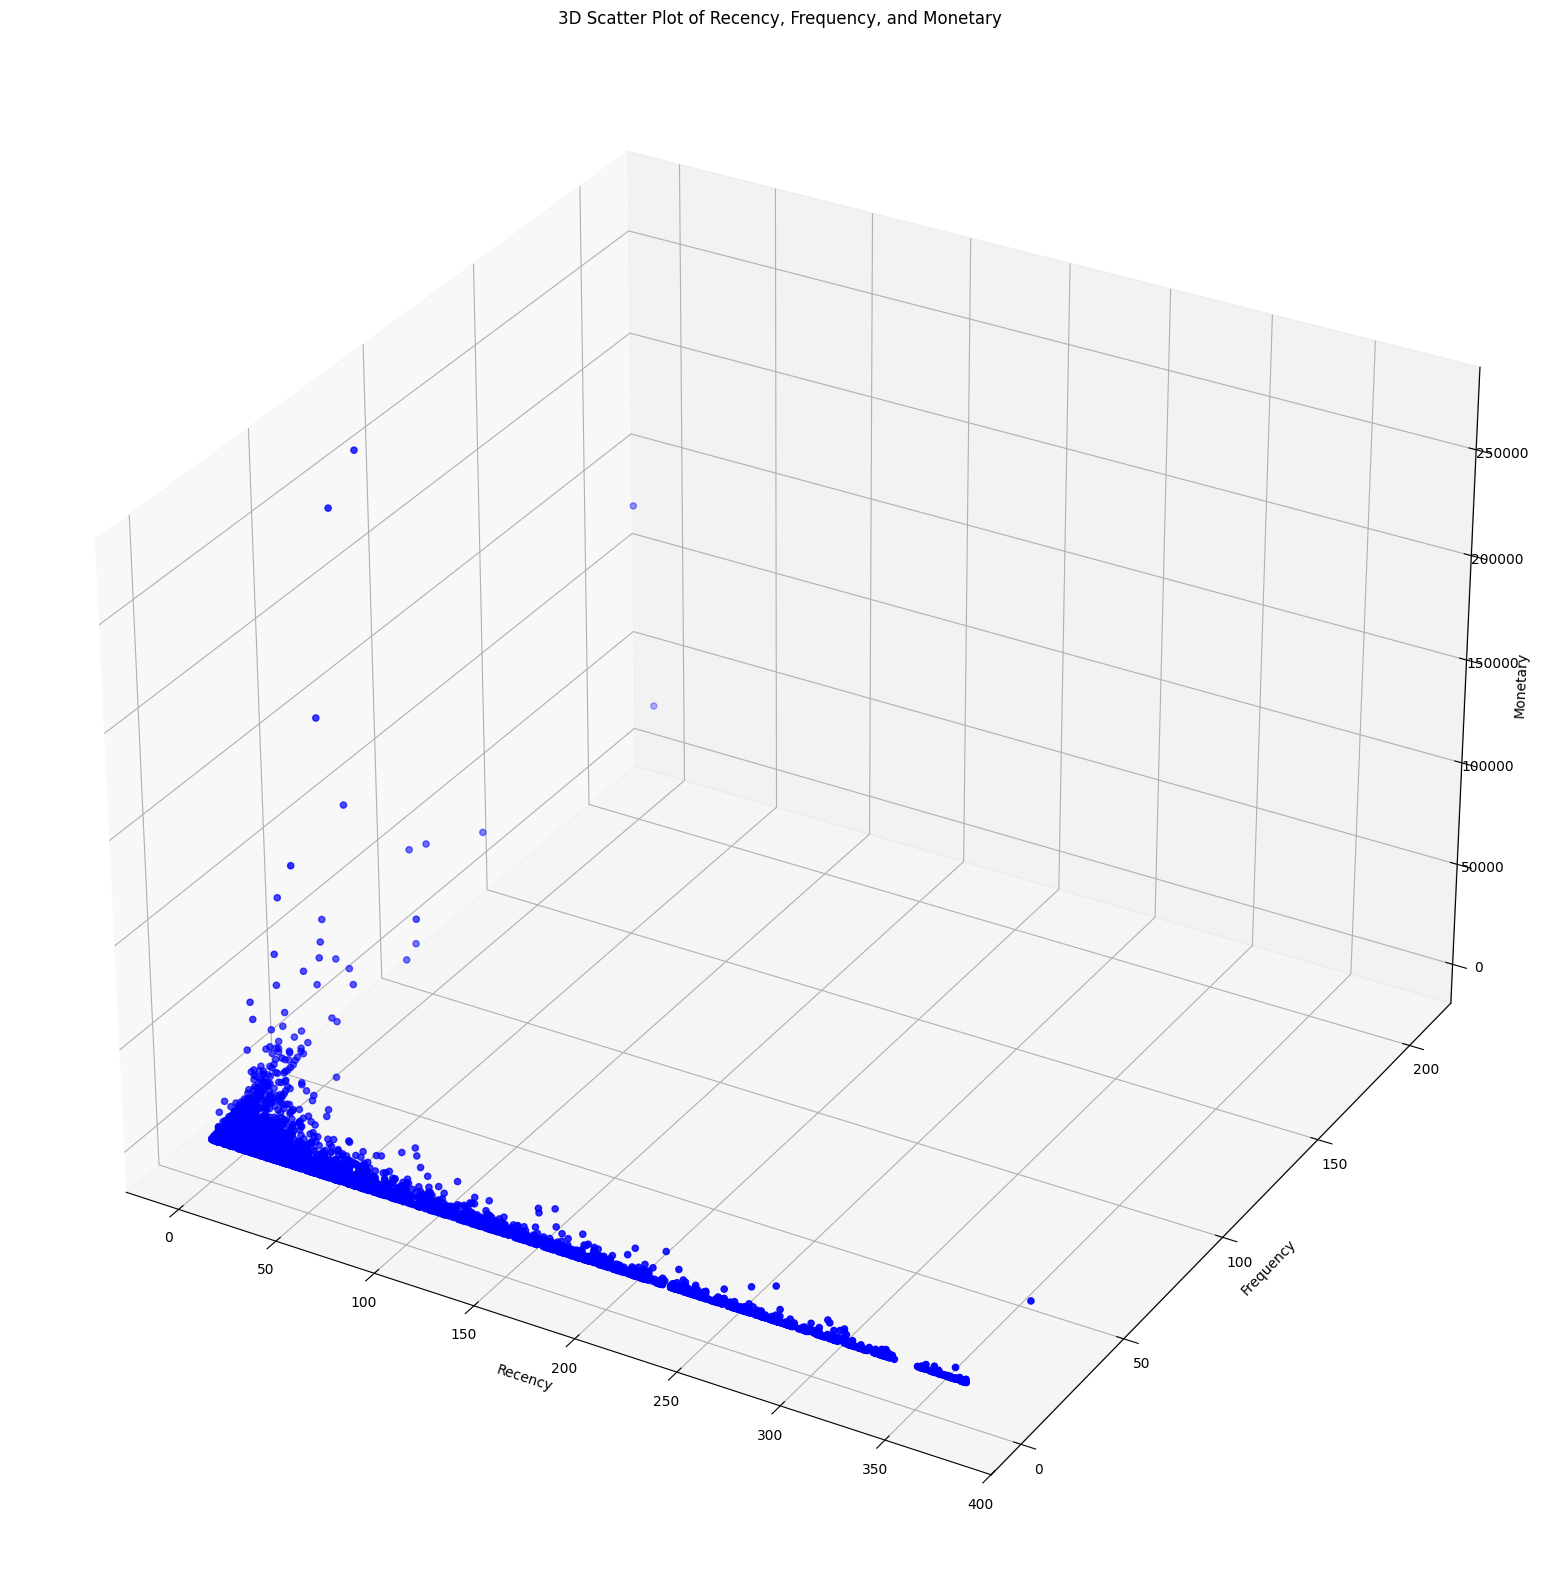

In [479]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_rmf['recency'], df_rmf['frequency'], df_rmf['monetary'], c='blue', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of Recency, Frequency, and Monetary')

plt.show()

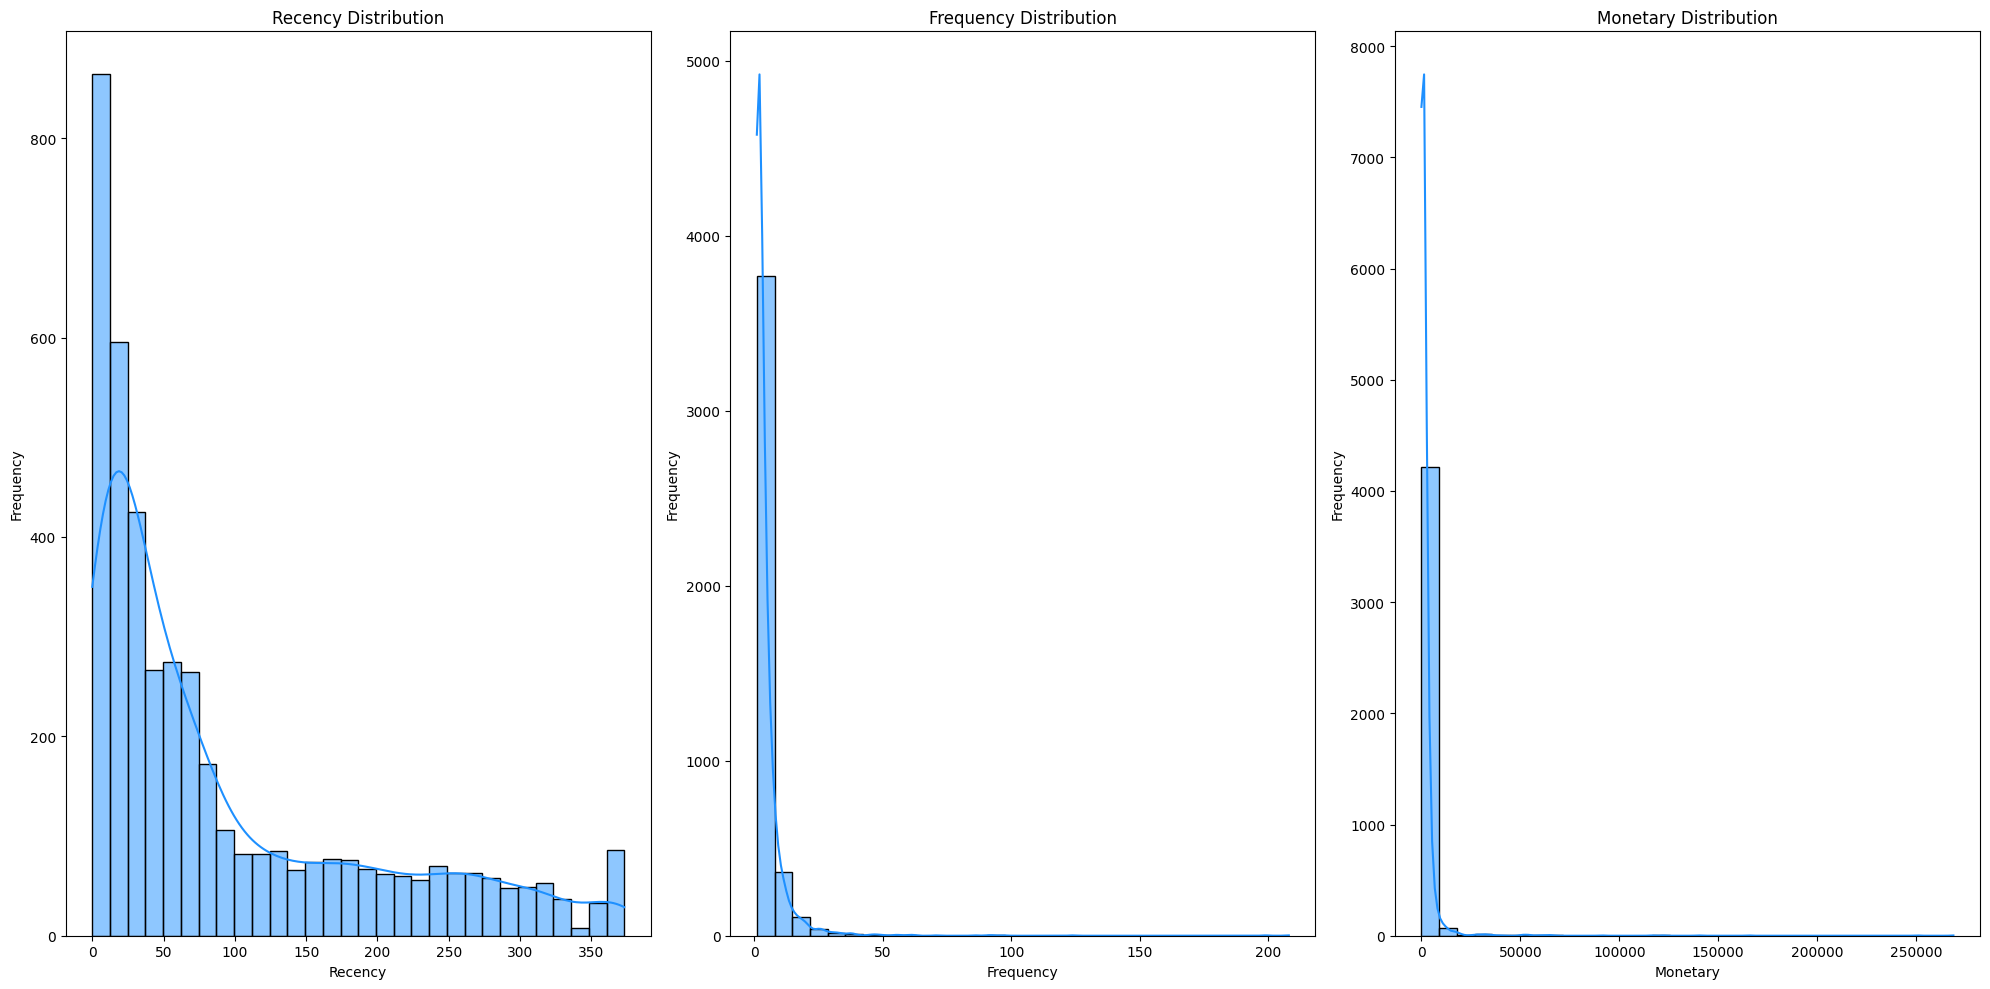

In [480]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(['recency', 'frequency', 'monetary'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_rmf[feature], kde=True, bins=30, color='dodgerblue')
    plt.title(f'{feature.capitalize()} Distribution')
    plt.xlabel(f'{feature.capitalize()}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [481]:
# Check skewness for each feature
skewness = df_rmf.skew()
print("Skewness of Features:")
print(skewness)

Skewness of Features:
CustomerID     0.002057
recency        1.246395
frequency     12.033446
monetary      20.856608
dtype: object


### Feature Scaling and Final Data Preparation

In [574]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['recency', 'frequency', 'monetary']

scaler = StandardScaler()

df_rmf_scaled[features_to_scale] = scaler.fit_transform(df_rmf_scaled[features_to_scale])

df_rmf_scaled.head()

,CustomerID,recency,frequency,monetary,cluster
0,17850.0,2.795733,3.880760,0.781894,2
1,13047.0,-0.605126,0.748876,0.372813,2
2,12583.0,-0.895200,1.401352,1.113818,2
3,13748.0,0.035035,0.096400,-0.135162,1
4,15100.0,2.415637,-0.164590,-0.153838,0


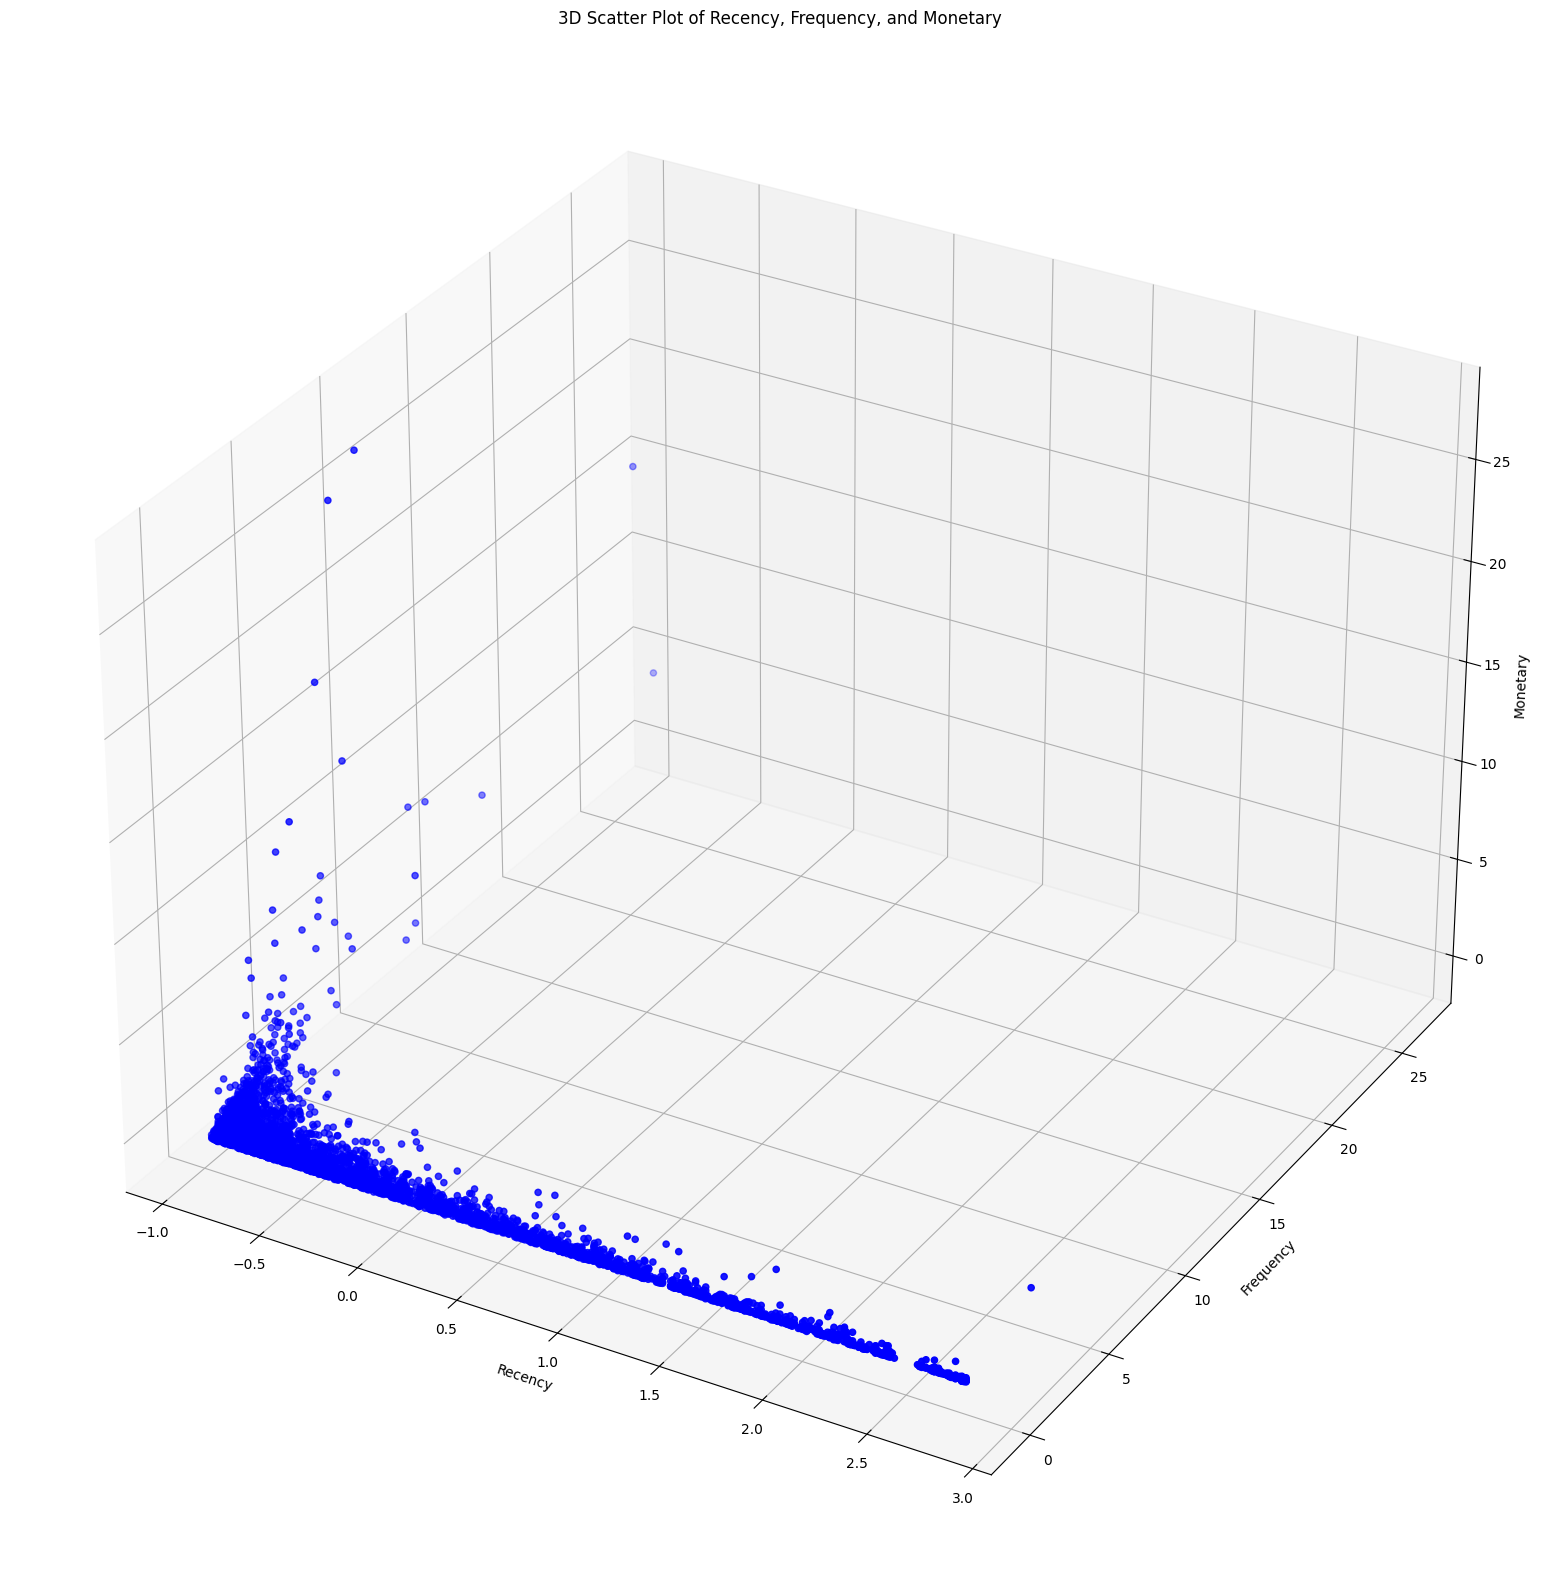

In [575]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_rmf_scaled['recency'], df_rmf_scaled['frequency'], df_rmf_scaled['monetary'], c='blue', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of Recency, Frequency, and Monetary')

plt.show()

# Model Training

In [576]:
# Exclude customerId from training data
df_features = df_rmf_scaled.drop(columns=['CustomerID'])
df_features.head()

,recency,frequency,monetary,cluster
0,2.795733,3.880760,0.781894,2
1,-0.605126,0.748876,0.372813,2
2,-0.895200,1.401352,1.113818,2
3,0.035035,0.096400,-0.135162,1
4,2.415637,-0.164590,-0.153838,0


## K-Means

In [577]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Testing K from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=20)
    labels = kmeans.fit_predict(df_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_features, labels))

# Print results
for i, k in enumerate(k_range):
    print(f'k={k}')
    print(f'inertia = {inertia[i]}, silhouette_score = {silhouette_scores[i]}\n')

k=2
inertia = 9841.967200458317, silhouette_score = 0.5677751913848039

k=3
inertia = 5856.848907871532, silhouette_score = 0.5953606621418298

k=4
inertia = 4117.685228971844, silhouette_score = 0.6079538245785817

k=5
inertia = 3322.1948143121135, silhouette_score = 0.6093473161295457

k=6
inertia = 2640.842255571294, silhouette_score = 0.6081014704398043

k=7
inertia = 2219.0766842287403, silhouette_score = 0.5995537035588719

k=8
inertia = 1793.2676127015118, silhouette_score = 0.5763810078736314

k=9
inertia = 1542.6040321647897, silhouette_score = 0.5770441996713849

k=10
inertia = 1340.4863797477792, silhouette_score = 0.43789985282198196



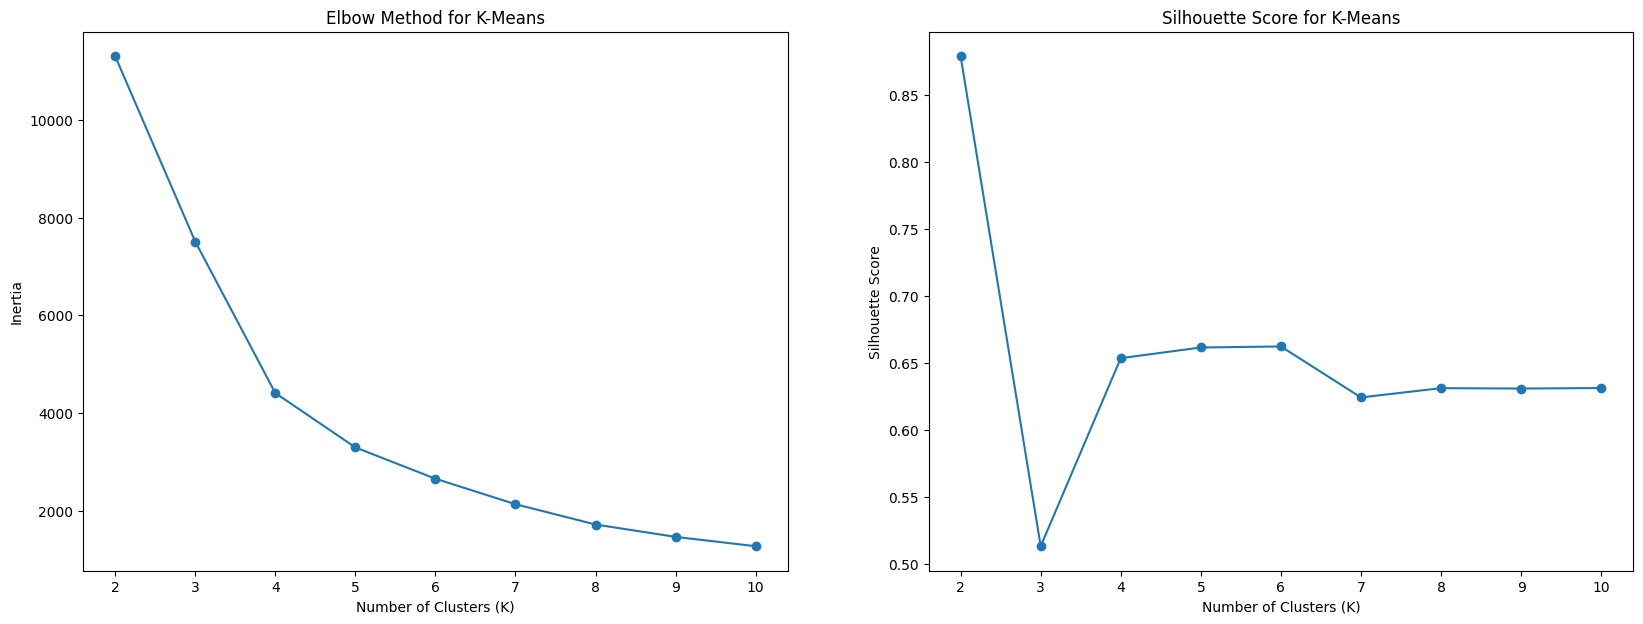

In [561]:
# Plot Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

axes[0].plot(k_range, inertia, marker='o')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for K-Means')

axes[1].plot(k_range, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for K-Means')

plt.show()

Based on the **silhouette score** and **elbow method**, k=4 is the most suitable choice,
thus k=4 is selected as the optimal number of clusters.

In [586]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_rmf['cluster'] = kmeans.fit_predict(df_features)
df_rmf.head()

,CustomerID,recency,frequency,monetary,cluster
0,17850.0,371,34,5391.21,3
1,13047.0,31,10,3237.54,3
2,12583.0,2,15,7281.38,3
3,13748.0,95,5,948.25,1
4,15100.0,333,3,876.00,0


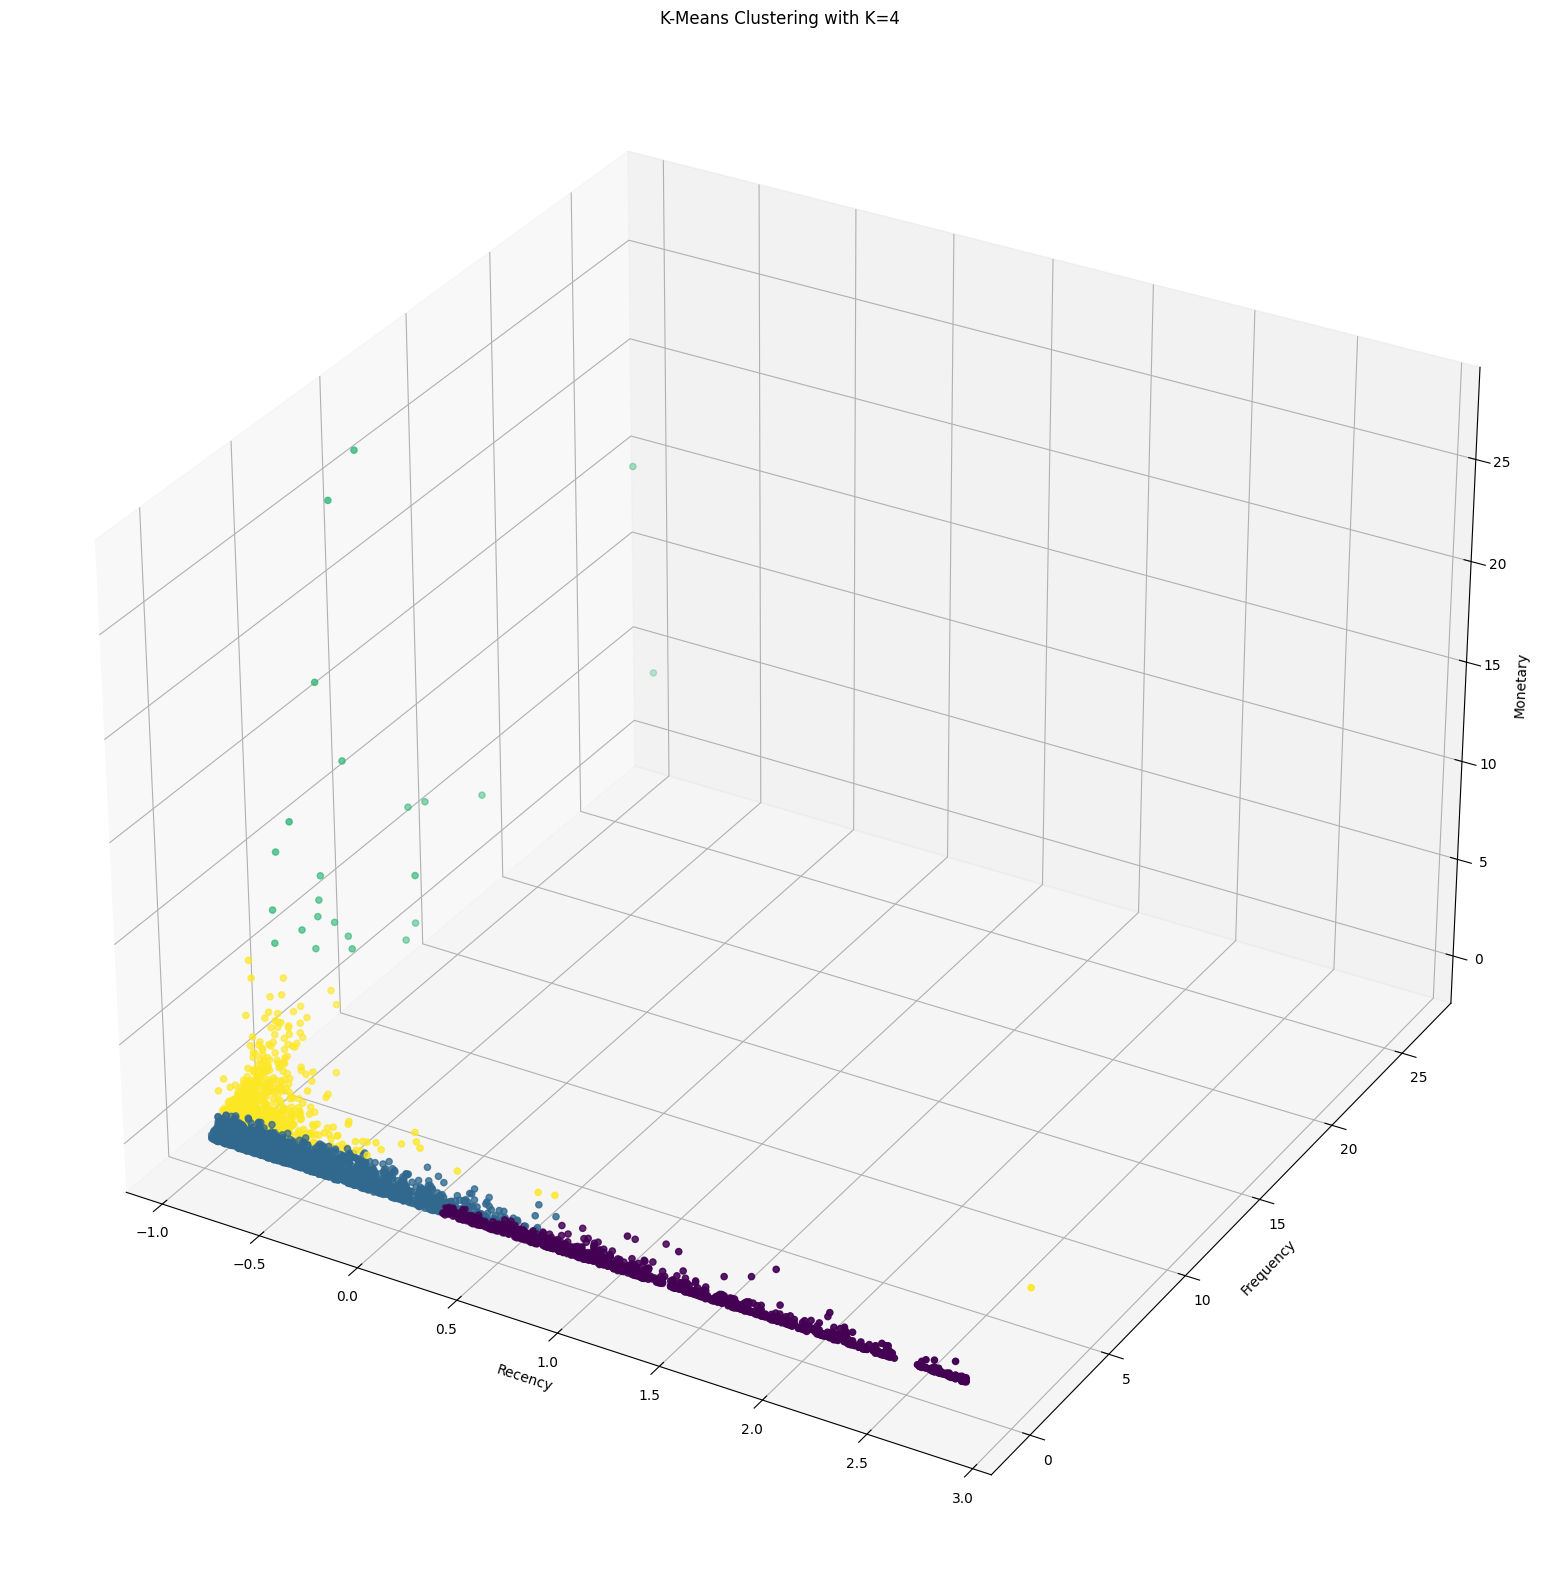

In [589]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
ax.scatter(df_rmf_scaled['recency'], df_rmf_scaled['frequency'], df_rmf_scaled['monetary'], 
           c=df_rmf['cluster'], cmap='viridis', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title(f'K-Means Clustering with K={best_k}')
plt.show()

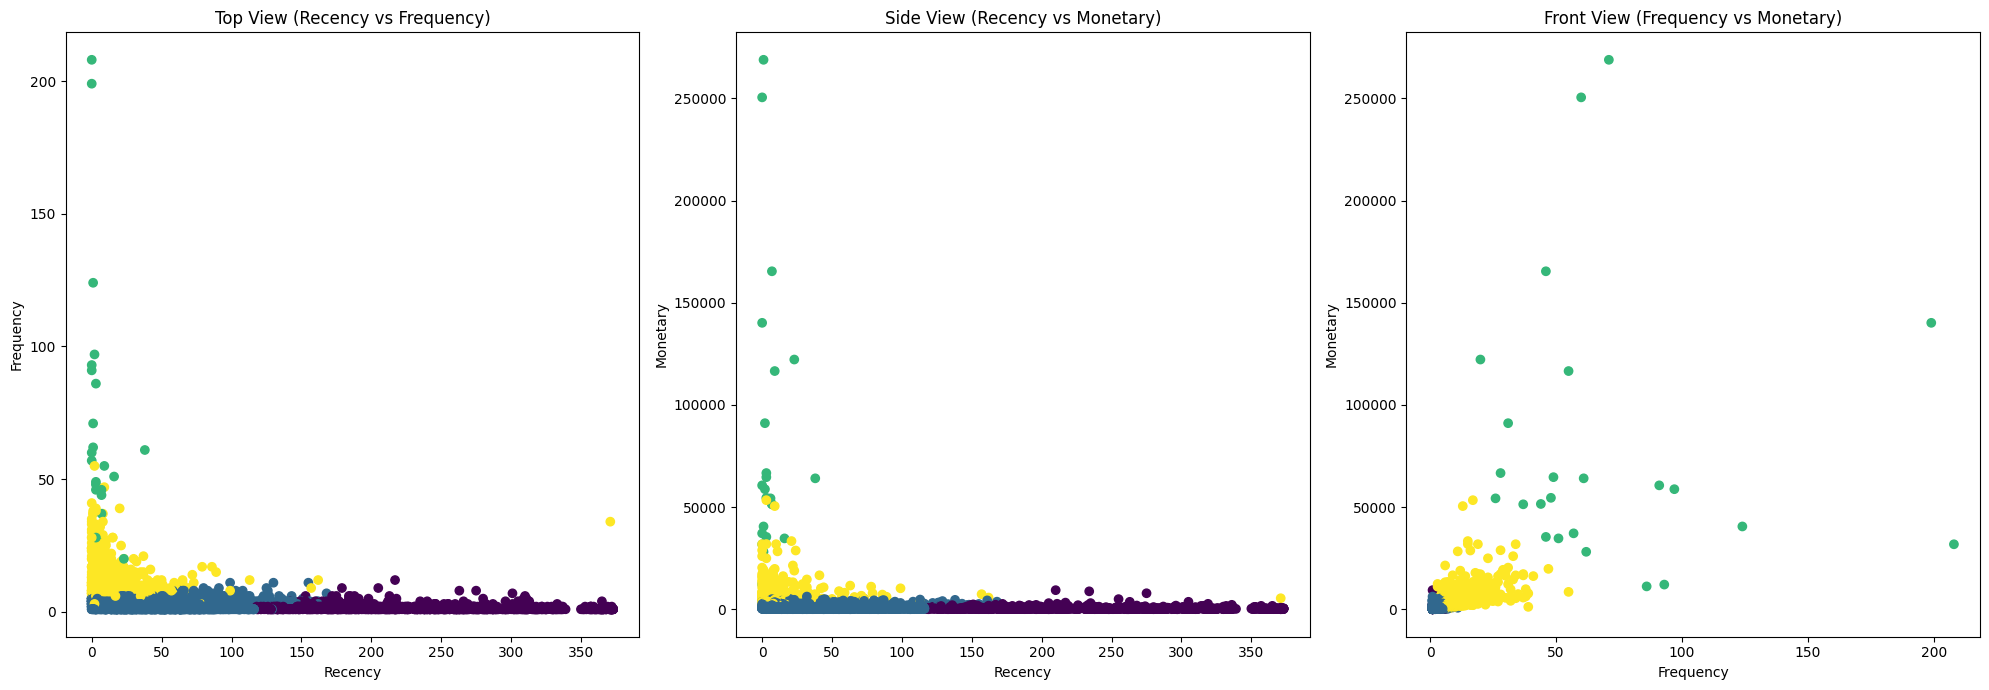

In [592]:
fig = plt.figure(figsize=(20, 7))

# 2D Top View
ax_top = fig.add_subplot(131)
ax_top.scatter(df_rmf['recency'], df_rmf['frequency'], 
               c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_top.set_xlabel('Recency')
ax_top.set_ylabel('Frequency')
ax_top.set_title('Top View (Recency vs Frequency)')

# 2D Side View (Recency vs Monetary)
ax_side = fig.add_subplot(132)
ax_side.scatter(df_rmf['recency'], df_rmf['monetary'], 
                c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_side.set_xlabel('Recency')
ax_side.set_ylabel('Monetary')
ax_side.set_title('Side View (Recency vs Monetary)')

# 2D Front View (Frequency vs Monetary)
ax_front = fig.add_subplot(133)
ax_front.scatter(df_rmf['frequency'], df_rmf['monetary'], 
                 c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_front.set_xlabel('Frequency')
ax_front.set_ylabel('Monetary')
ax_front.set_title('Front View (Frequency vs Monetary)')

# Show the plots
plt.tight_layout()
plt.show()

## DBSCAN

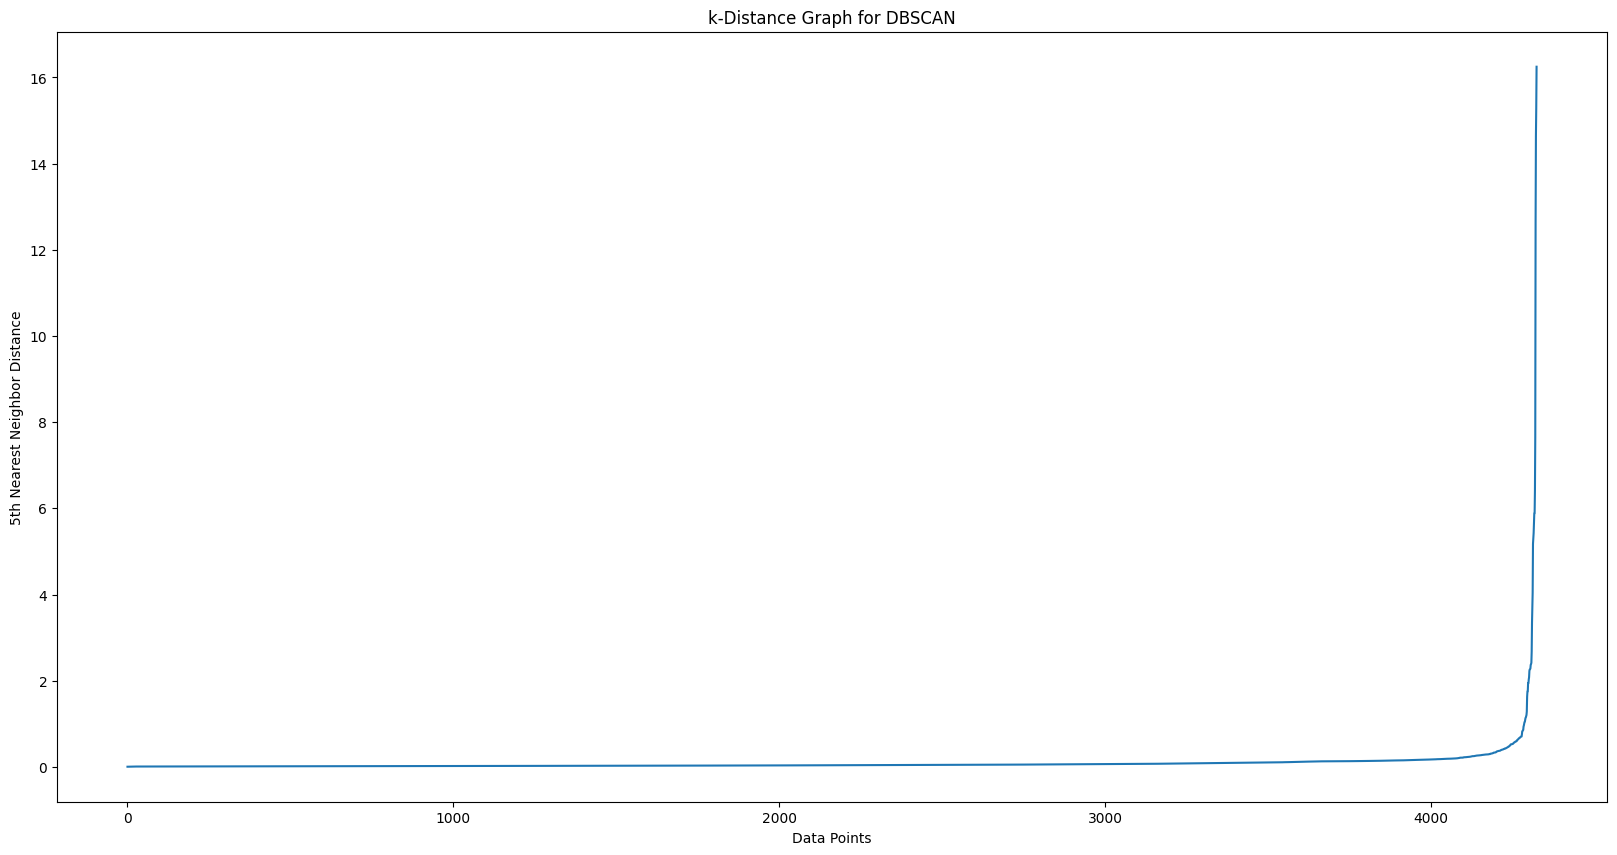

In [596]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(df_features)
distances, indices = neighbors.kneighbors(df_features)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(20, 10))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-Distance Graph for DBSCAN')
plt.show()

Based on the **k-distance graph**, the best `eps` value is determined to be 0.8, as it corresponds to the **"elbow"** in the plot, 
where the rate of increase in distance sharply rises. This is typically the optimal value for DBSCAN's density-based clustering.

In [598]:
eps_value = 0.8

dbscan = DBSCAN(eps=eps_value, min_samples=5)
df_rmf['cluster'] = dbscan.fit_predict(df_features)

valid_clusters = df_rmf[df_rmf['cluster'] != -1]  # Exclude noise points (-1)

if len(valid_clusters) > 0:
    dbscan_silhouette = silhouette_score(valid_clusters[features_to_scale], valid_clusters['cluster'])
    print(f"DBSCAN Silhouette Score (valid clusters only): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN couldn't form valid clusters (only noise). Consider adjusting parameters.")

DBSCAN Silhouette Score (valid clusters only): 0.0227


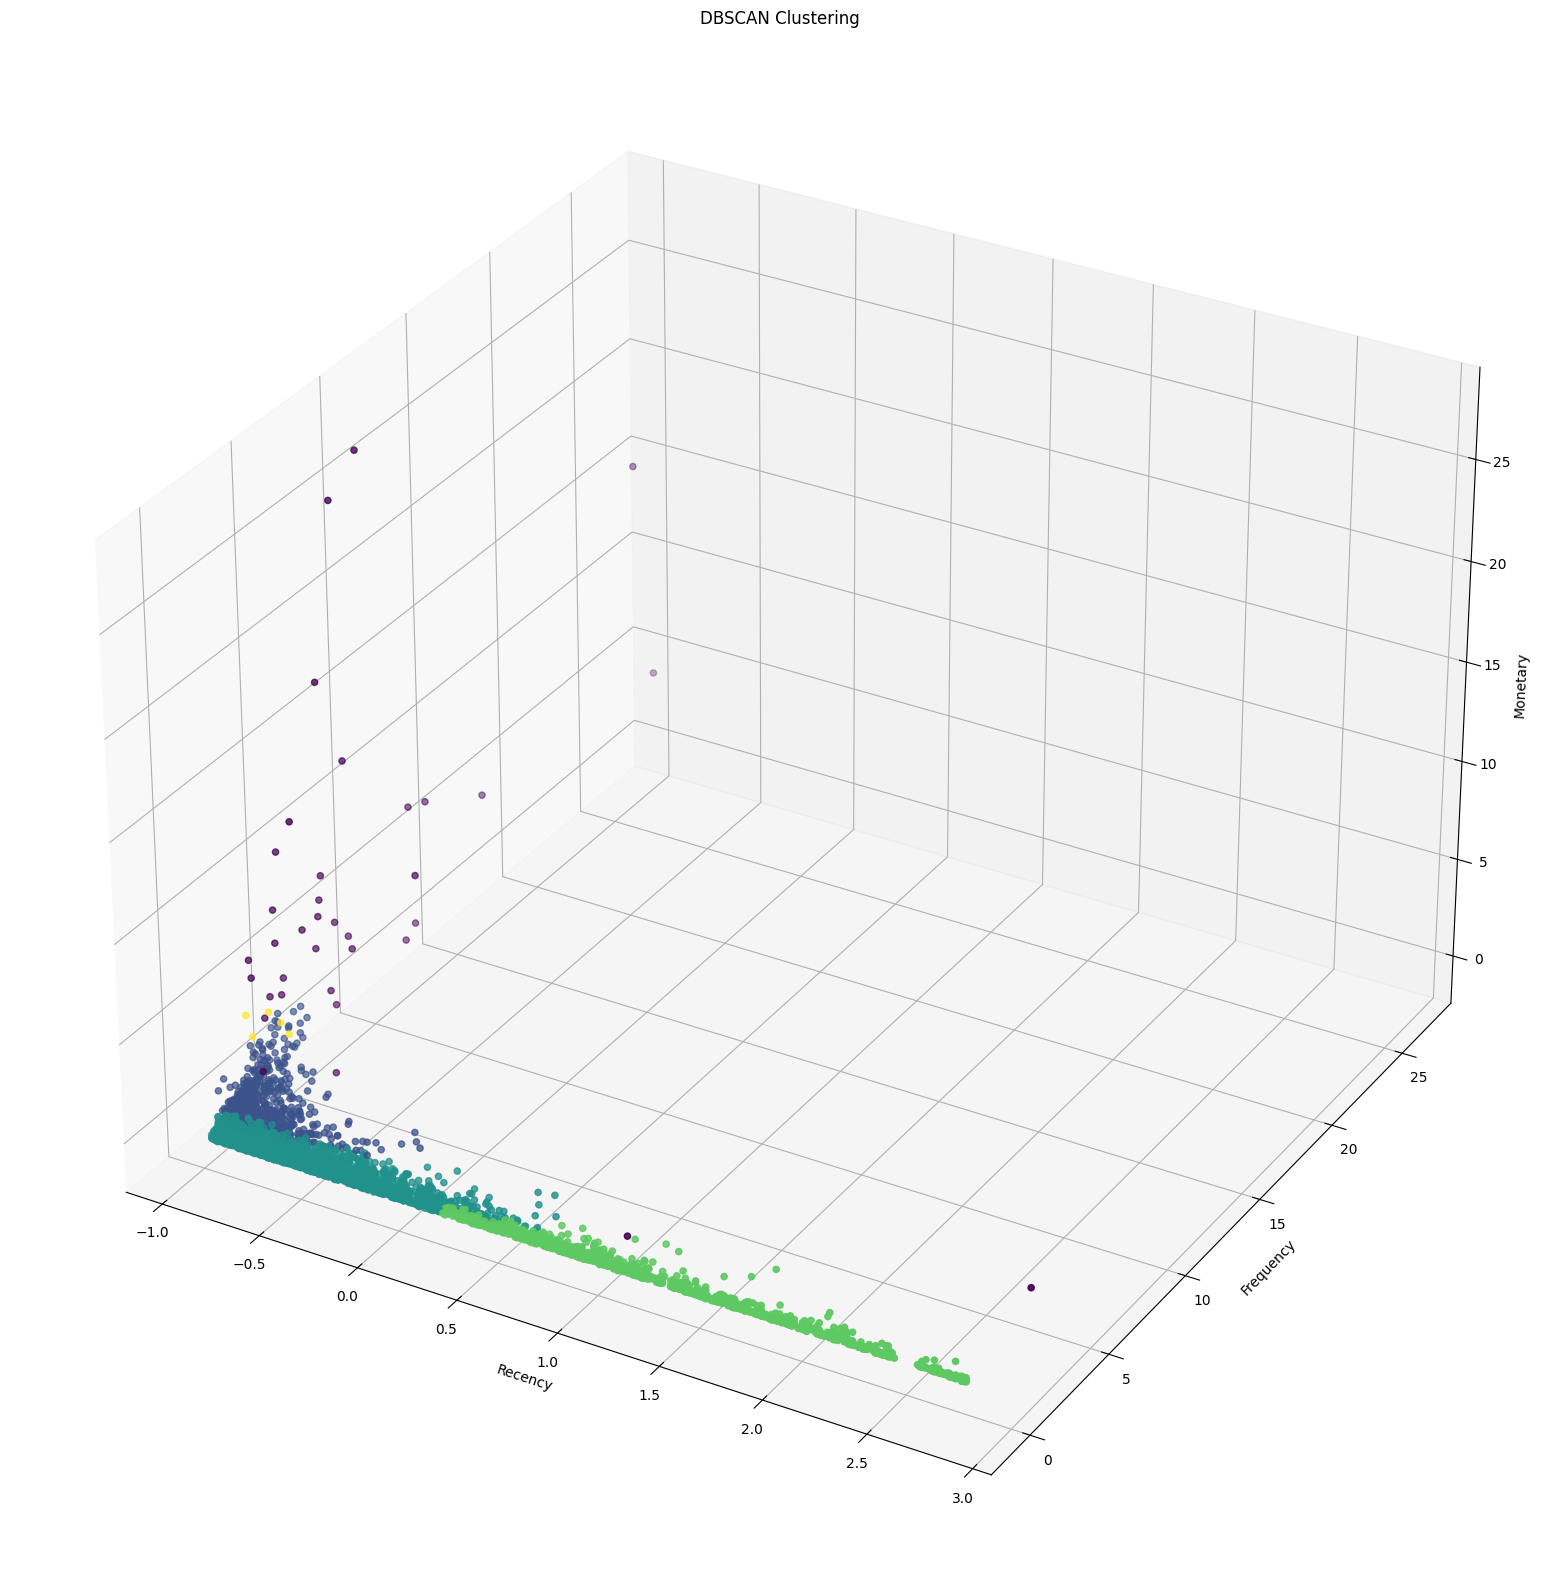

In [599]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with DBSCAN cluster coloring
ax.scatter(df_rmf_scaled['recency'], df_rmf_scaled['frequency'], df_rmf_scaled['monetary'],
           c=df_rmf['cluster'], cmap='viridis', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('DBSCAN Clustering')

plt.show()

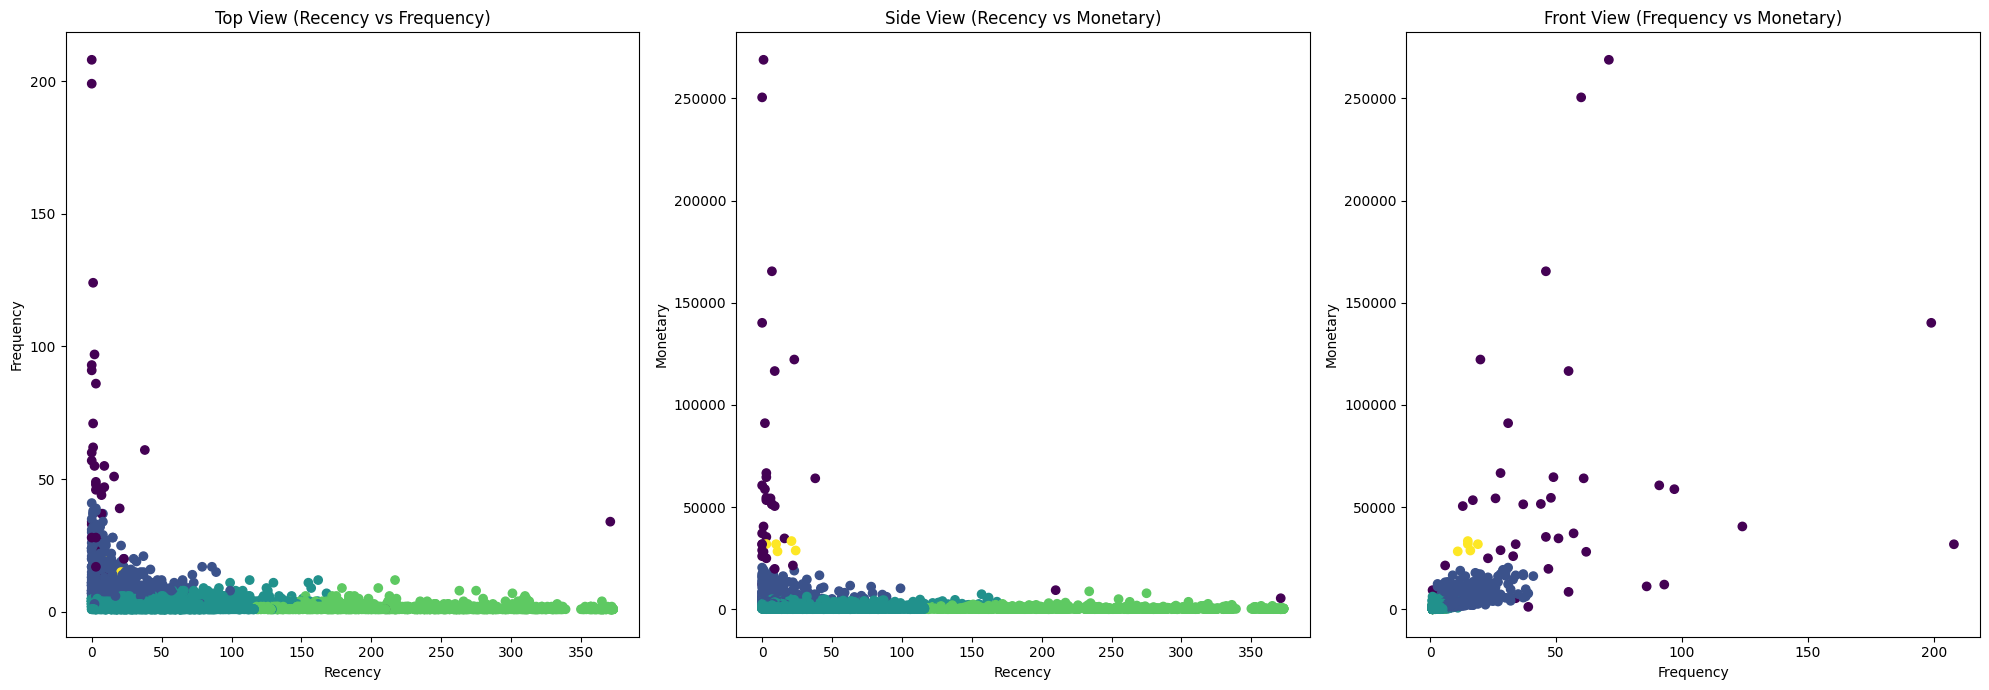

In [600]:
fig = plt.figure(figsize=(20, 7))

# 2D Top View
ax_top = fig.add_subplot(131)
ax_top.scatter(df_rmf['recency'], df_rmf['frequency'], 
               c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_top.set_xlabel('Recency')
ax_top.set_ylabel('Frequency')
ax_top.set_title('Top View (Recency vs Frequency)')

# 2D Side View (Recency vs Monetary)
ax_side = fig.add_subplot(132)
ax_side.scatter(df_rmf['recency'], df_rmf['monetary'], 
                c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_side.set_xlabel('Recency')
ax_side.set_ylabel('Monetary')
ax_side.set_title('Side View (Recency vs Monetary)')

# 2D Front View (Frequency vs Monetary)
ax_front = fig.add_subplot(133)
ax_front.scatter(df_rmf['frequency'], df_rmf['monetary'], 
                 c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_front.set_xlabel('Frequency')
ax_front.set_ylabel('Monetary')
ax_front.set_title('Front View (Frequency vs Monetary)')

# Show the plots
plt.tight_layout()
plt.show()

## Hierarchical Clustering

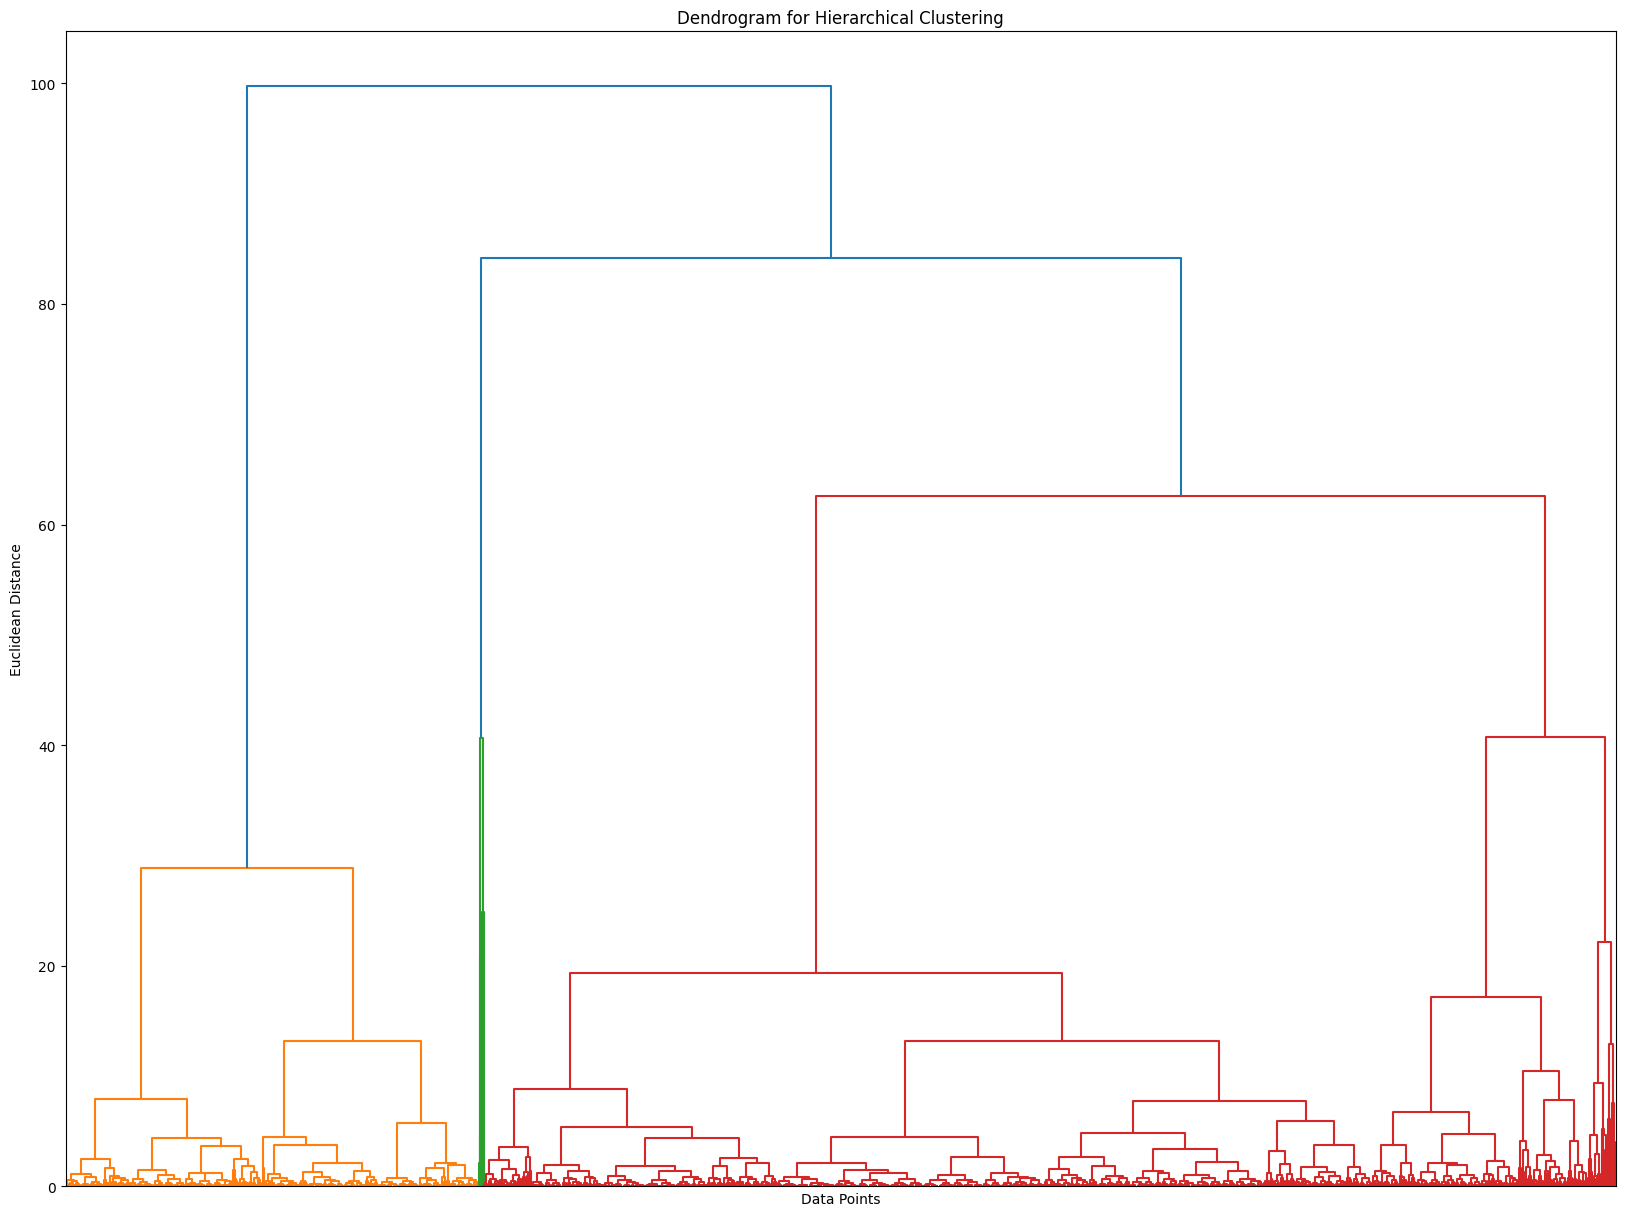

In [601]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Z = linkage(df_features, method='ward')  # 'ward' minimizes the variance within clusters

# Plot the dendrogram
plt.figure(figsize=(20, 15))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.xticks([])
plt.show()

In [602]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_rmf['cluster'] = agg_clustering.fit_predict(df_features)

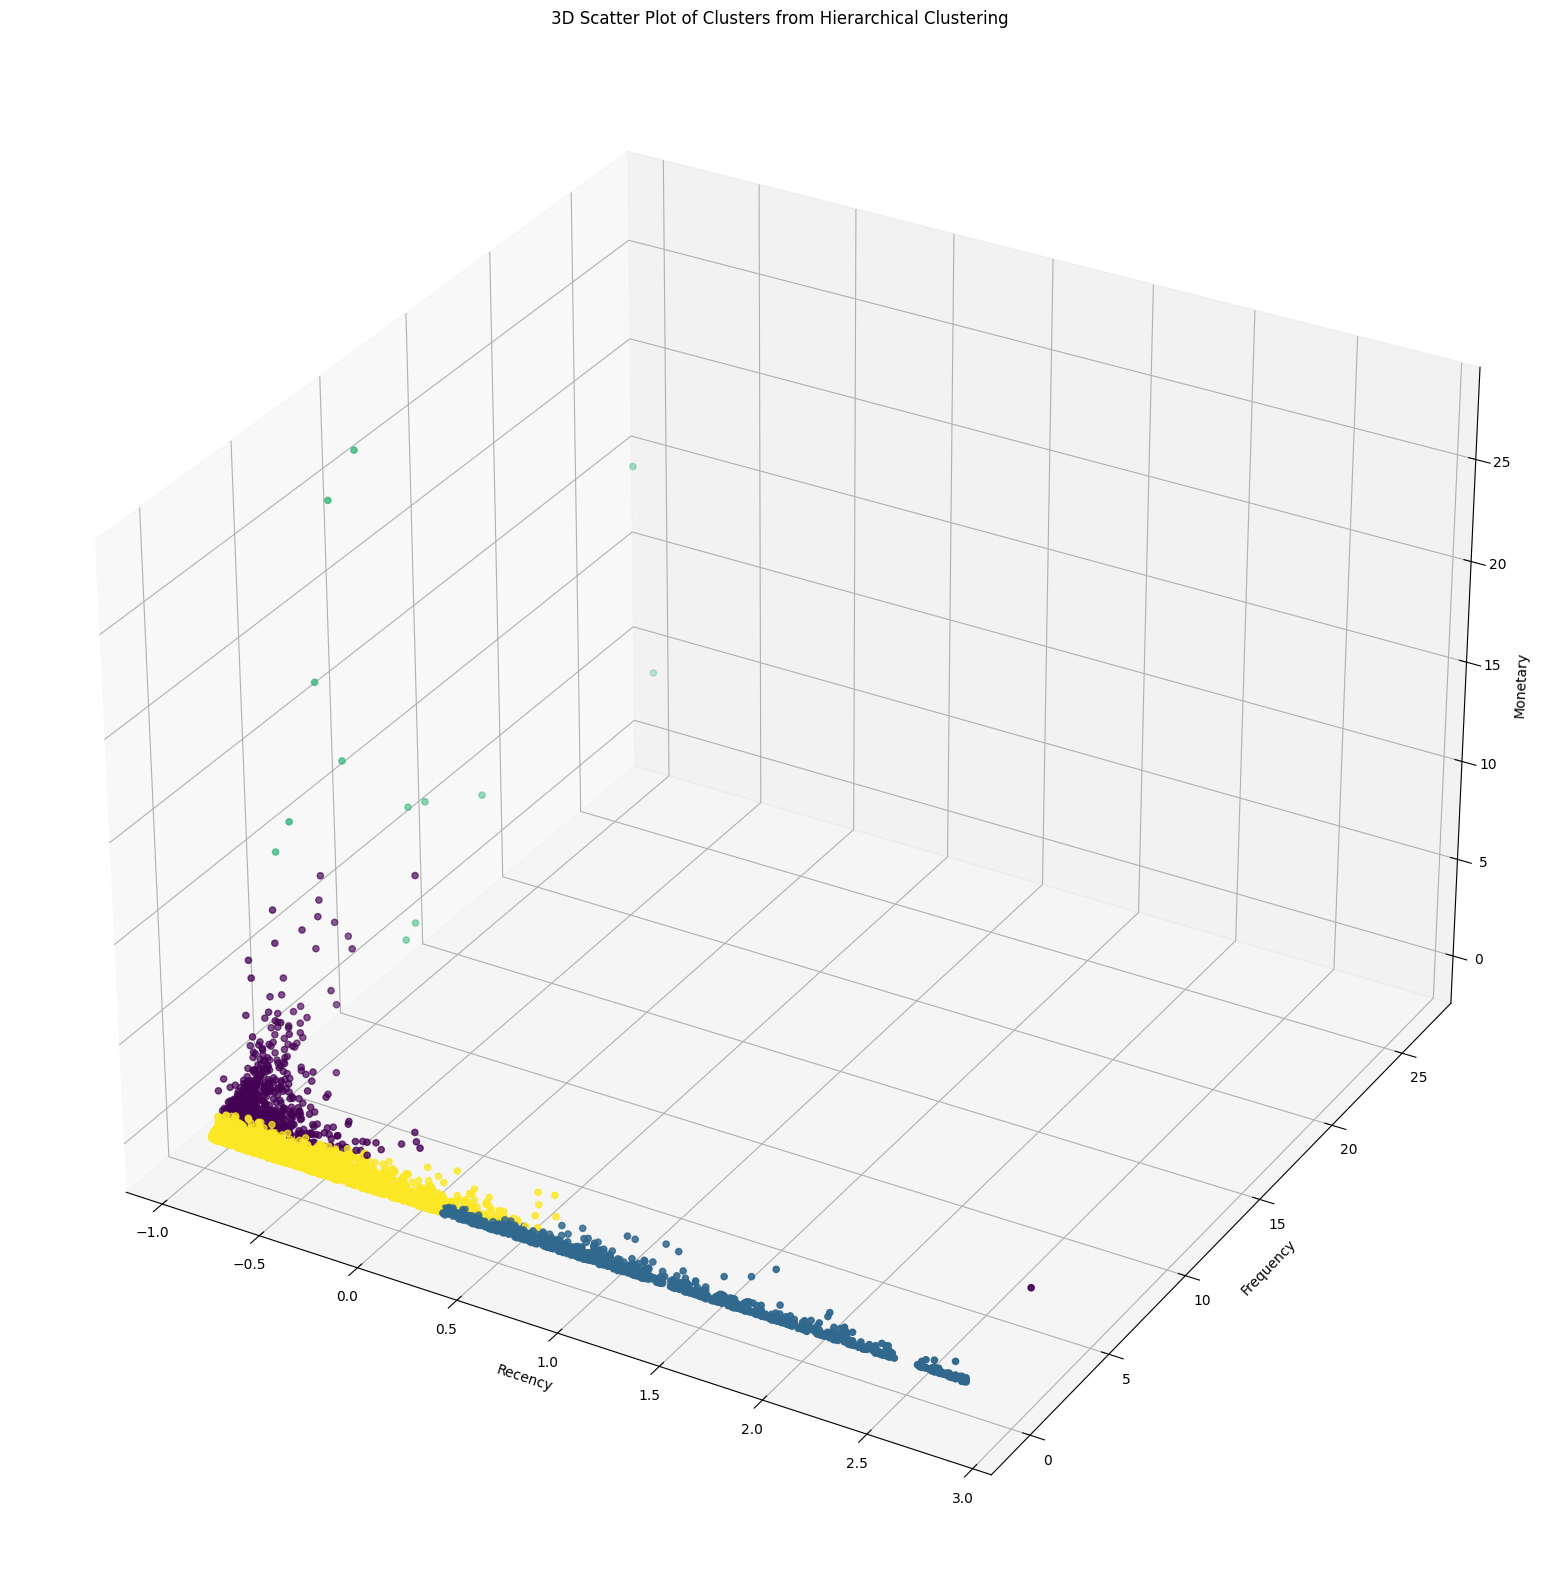

Silhouette Score for hierarchical clustering: 0.6048259911962395


In [603]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_rmf_scaled['recency'], df_rmf_scaled['frequency'], df_rmf_scaled['monetary'], c=df_rmf['cluster'], cmap='viridis', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of Clusters from Hierarchical Clustering')
plt.show()

# Optional: Evaluate the clustering with silhouette score (to measure clustering quality)
from sklearn.metrics import silhouette_score
score = silhouette_score(df_features, df_rmf['cluster'])
print(f"Silhouette Score for hierarchical clustering: {score}")

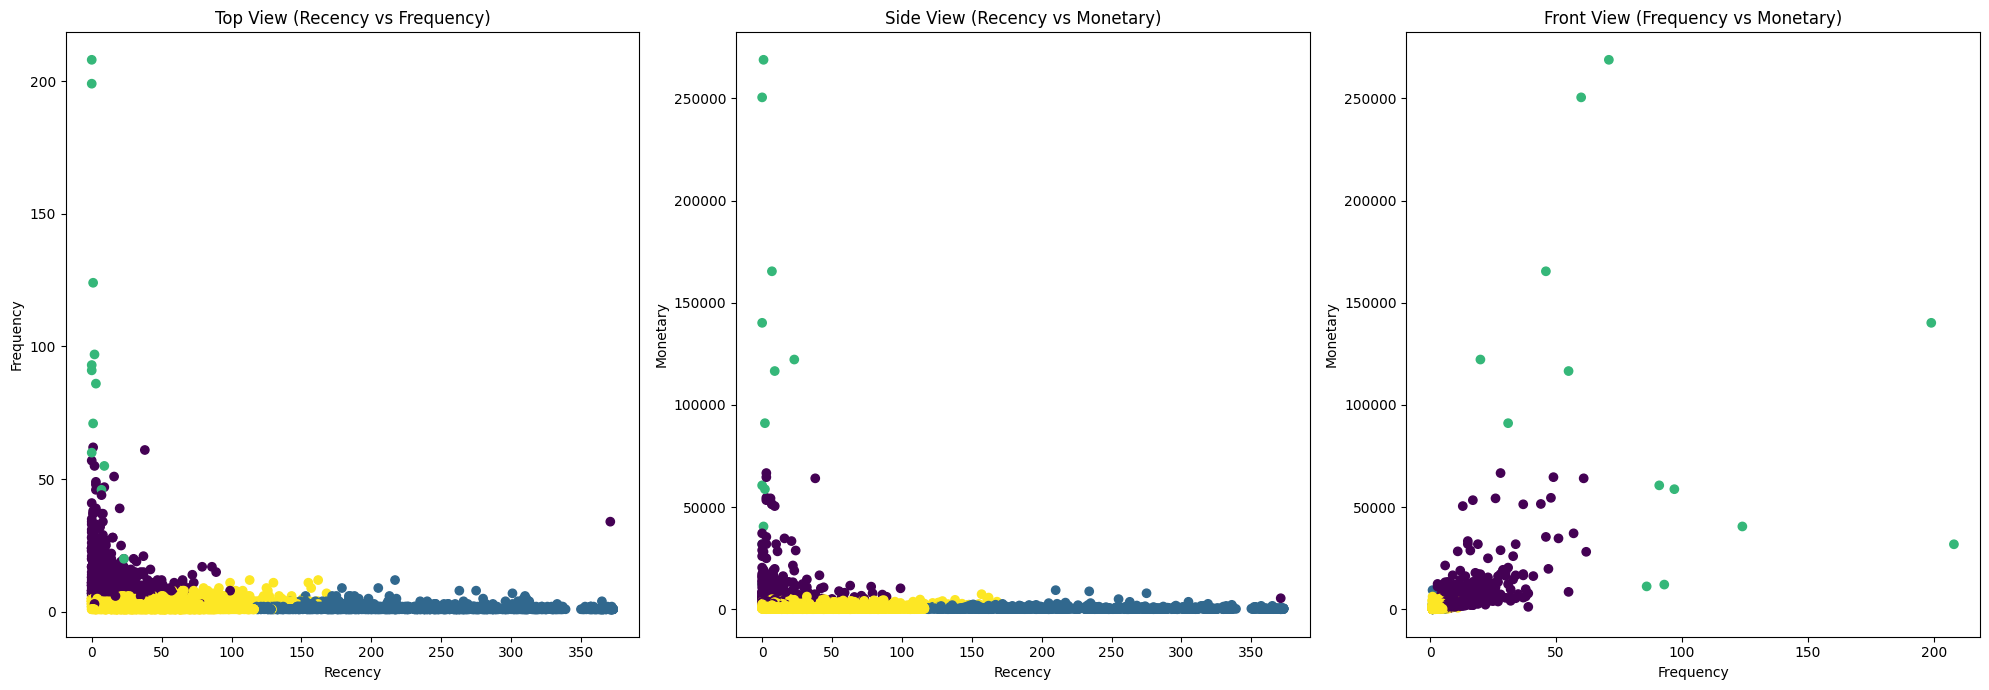

In [604]:
fig = plt.figure(figsize=(20, 7))

# 2D Top View
ax_top = fig.add_subplot(131)
ax_top.scatter(df_rmf['recency'], df_rmf['frequency'], 
               c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_top.set_xlabel('Recency')
ax_top.set_ylabel('Frequency')
ax_top.set_title('Top View (Recency vs Frequency)')

# 2D Side View (Recency vs Monetary)
ax_side = fig.add_subplot(132)
ax_side.scatter(df_rmf['recency'], df_rmf['monetary'], 
                c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_side.set_xlabel('Recency')
ax_side.set_ylabel('Monetary')
ax_side.set_title('Side View (Recency vs Monetary)')

# 2D Front View (Frequency vs Monetary)
ax_front = fig.add_subplot(133)
ax_front.scatter(df_rmf['frequency'], df_rmf['monetary'], 
                 c=df_rmf['cluster'], cmap='viridis', marker='o')
ax_front.set_xlabel('Frequency')
ax_front.set_ylabel('Monetary')
ax_front.set_title('Front View (Frequency vs Monetary)')

# Show the plots
plt.tight_layout()
plt.show()

# Cluster Interpretation

After evaluating different clustering models, K-Means with K=4 was found to be the most effective segmentation approach.

**Key Findings:**

- Silhouette Score: The K-Means model with K=4 achieved a silhouette score of 0.6, indicating well-separated clusters.

- Meaningful Separation: The segments identified by the model provided meaningful differentiation between customer groups based on purchasing behaviors.

- Cluster Interpretability: Each cluster exhibited distinct characteristics, allowing for actionable business insights.

In [605]:
df_rmf['cluster'] = kmeans.fit_predict(df_features)

In [606]:
df_rmf.head()

,CustomerID,recency,frequency,monetary,cluster
0,17850.0,371,34,5391.21,3
1,13047.0,31,10,3237.54,3
2,12583.0,2,15,7281.38,3
3,13748.0,95,5,948.25,1
4,15100.0,333,3,876.00,0


In [609]:
df_rmf.groupby('cluster').describe(include='all').T

cluster                     0           1             2            3
CustomerID count         1154        2475            24          672
           unique        1154        2475            24          672
           top        14406.0     12713.0       15311.0      14503.0
           freq             1           1             1            1
           mean           NaN         NaN           NaN          NaN
           std            NaN         NaN           NaN          NaN
           min            NaN         NaN           NaN          NaN
           25%            NaN         NaN           NaN          NaN
           50%            NaN         NaN           NaN          NaN
           75%            NaN         NaN           NaN          NaN
           max            NaN         NaN           NaN          NaN
recency    count       1154.0      2475.0          24.0        672.0
           unique         NaN         NaN           NaN          NaN
           top            NaN         NaN           NaN          NaN
           freq           NaN         NaN           NaN          NaN
           mean    237.982669   44.487273         5.625    16.150298
           std      71.105565   33.806025      8.820985    22.683391
           min          118.0         0.0           0.0          0.0
           25%          178.0        17.0          0.75          3.0
           50%          235.0        36.0           3.0         10.0
           75%         290.75        66.5           7.0         22.0
           max          373.0       168.0          38.0        371.0
frequency  count       1154.0      2475.0          24.0        672.0
           unique         NaN         NaN           NaN          NaN
           top            NaN         NaN           NaN          NaN
           freq           NaN         NaN           NaN          NaN
           mean      1.508666    2.750707     70.416667    12.188988
           std         1.0058    1.636684     48.056051      6.84151
           min            1.0         1.0          20.0          2.0
           25%            1.0         1.0          45.5          8.0
           50%            1.0         2.0          56.0         10.0
           75%            2.0         4.0         87.25         14.0
           max           12.0        11.0         208.0         55.0
monetary   count       1154.0      2475.0          24.0        672.0
           unique         NaN         NaN           NaN          NaN
           top            NaN         NaN           NaN          NaN
           freq           NaN         NaN           NaN          NaN
           mean    458.135547   956.37131  79676.452917  5229.417202
           std     620.714153  885.486618  67612.465401  5276.332079
           min            2.9         6.2      11189.91        716.0
           25%       167.3125     339.075    36716.0375    2338.3525
           50%         307.86      679.44      56648.11       3705.5
           75%       527.4975     1270.36     97440.905    6018.8375
           max        9341.26      6748.8     268891.46      53384.8

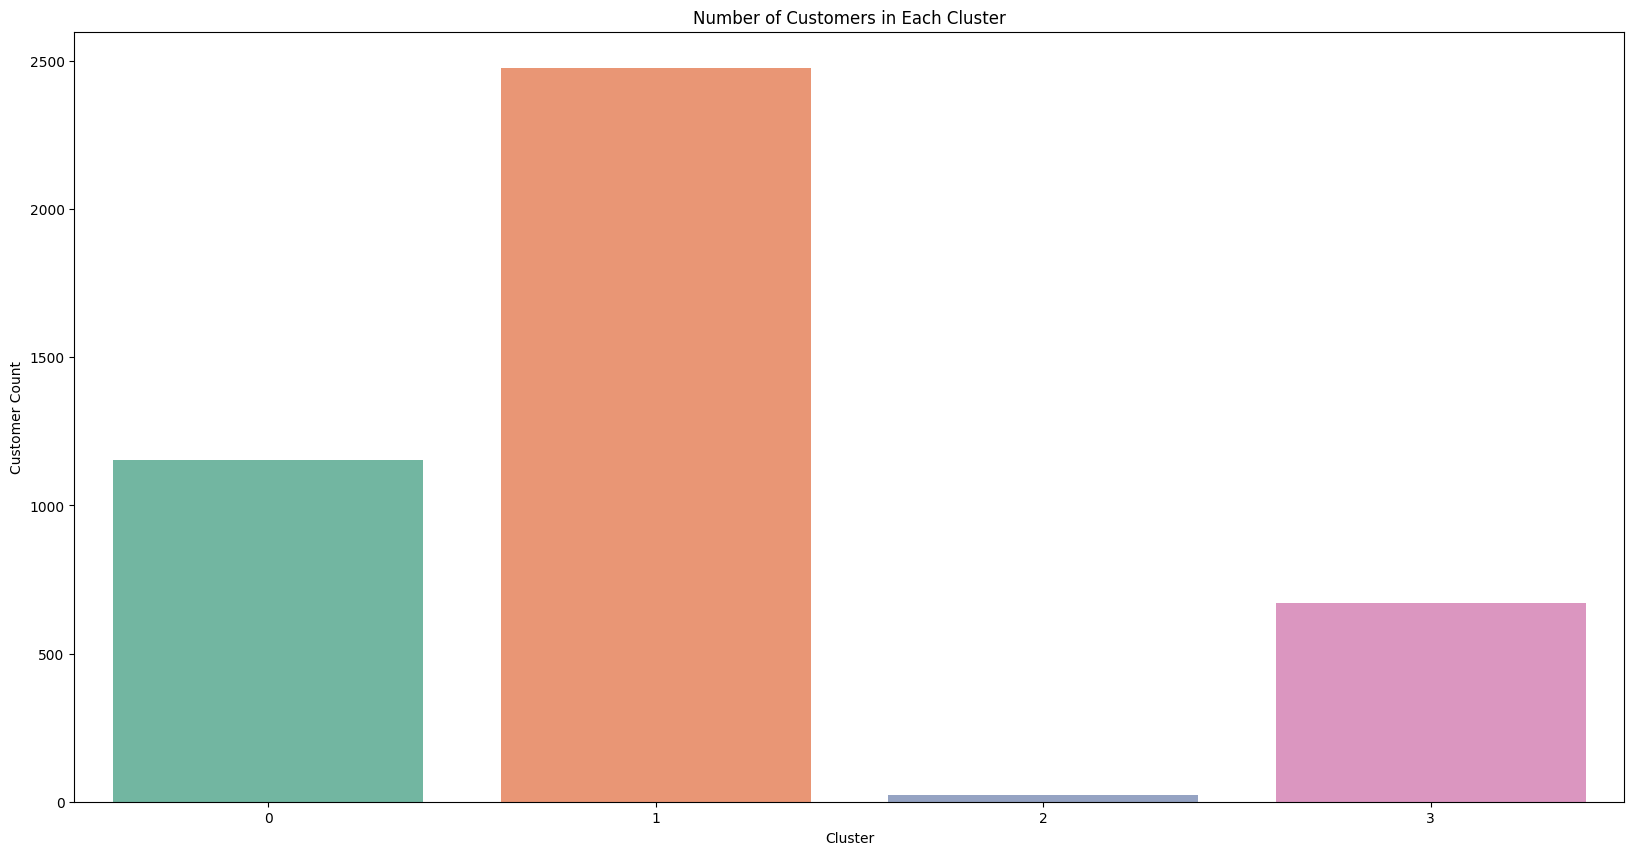

In [625]:
plt.figure(figsize=(20, 10))

sns.countplot(x='cluster', data=df_rmf, palette='Set2')

plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Count')

plt.show()

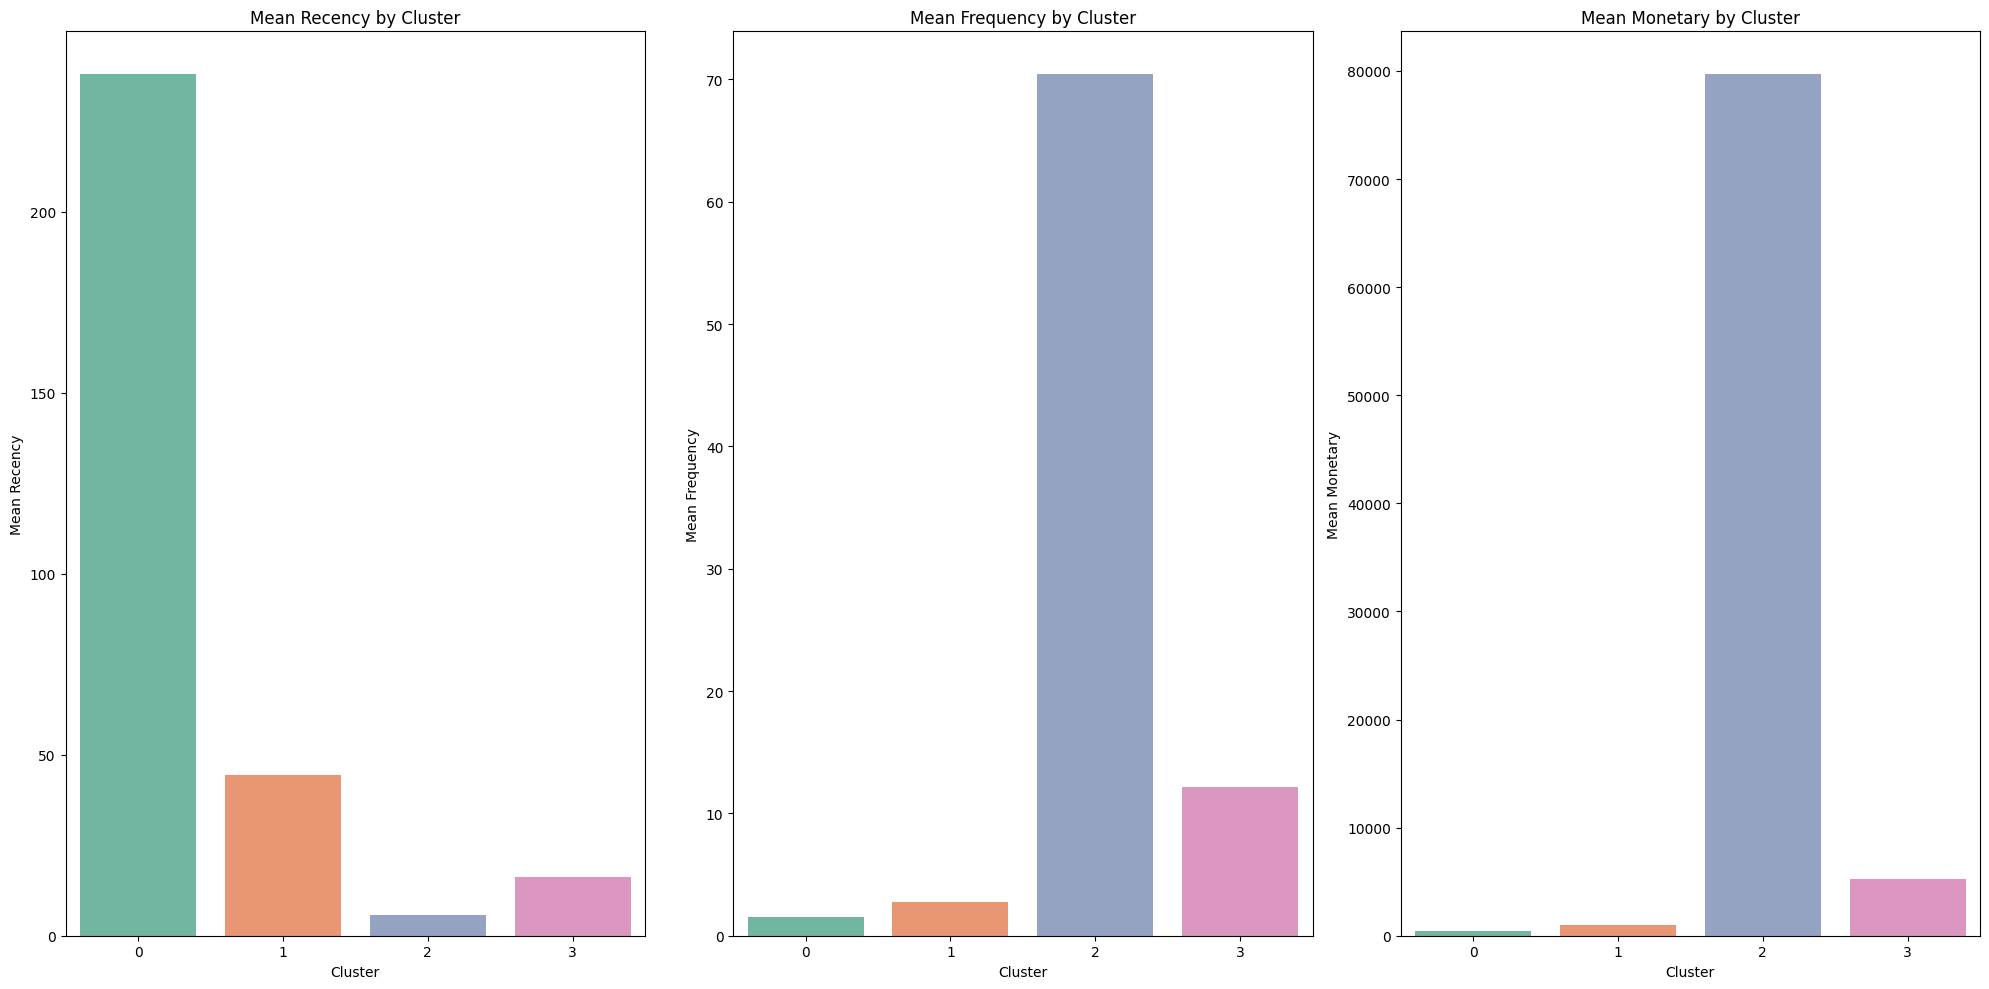

In [626]:
cluster_means = df_rmf.groupby('cluster')[['recency', 'frequency', 'monetary']].mean()

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
sns.barplot(x=cluster_means.index, y=cluster_means['recency'], palette='Set2')
plt.title('Mean Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Recency')

plt.subplot(1, 3, 2)
sns.barplot(x=cluster_means.index, y=cluster_means['frequency'], palette='Set2')
plt.title('Mean Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Frequency')

plt.subplot(1, 3, 3)
sns.barplot(x=cluster_means.index, y=cluster_means['monetary'], palette='Set2')
plt.title('Mean Monetary by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Monetary')

plt.tight_layout()
plt.show()

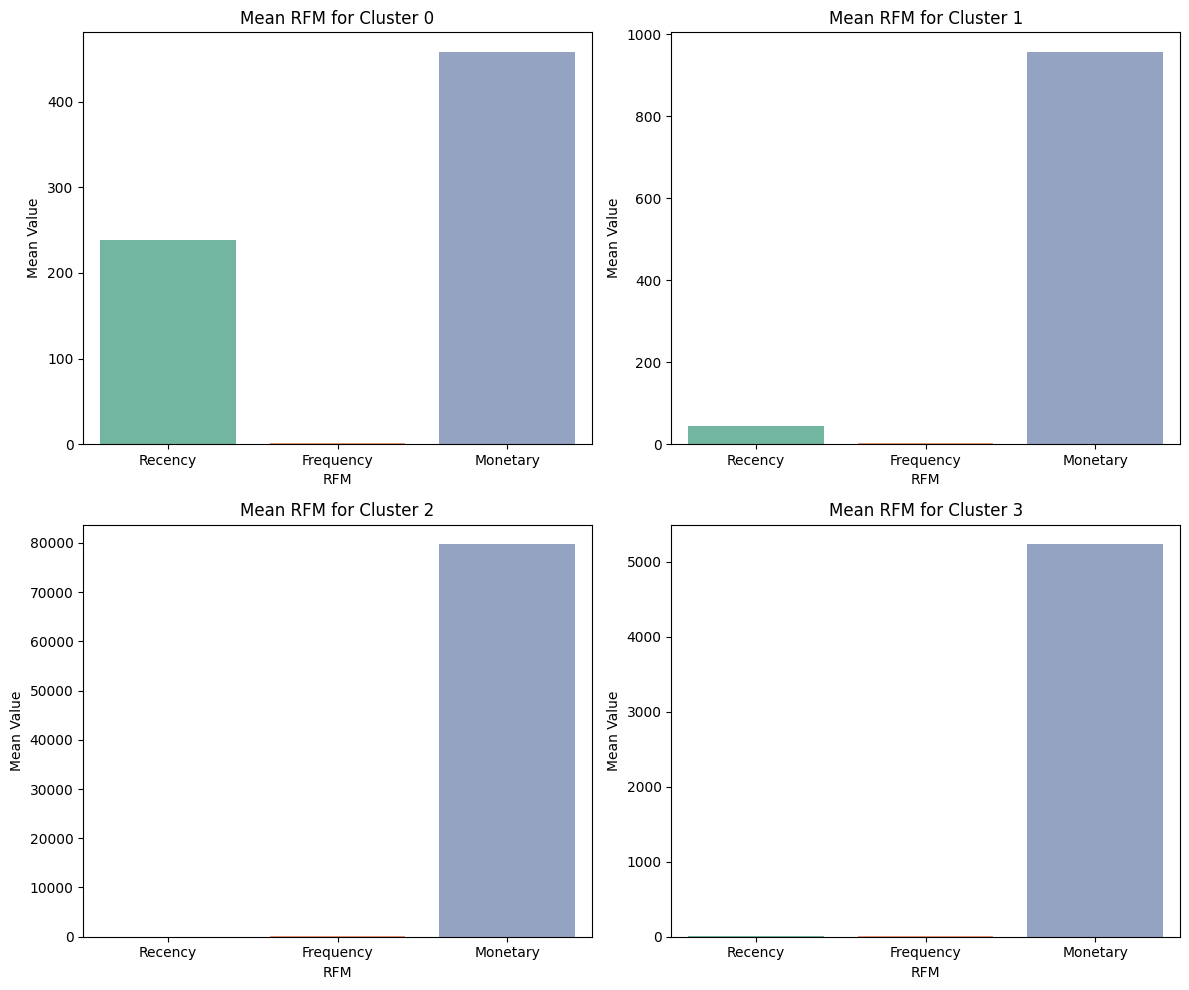

In [627]:
cluster_means = df_rmf.groupby('cluster')[['recency', 'frequency', 'monetary']].mean()

plt.figure(figsize=(12, 10))

for cluster_id in df_rmf['cluster'].unique():
    cluster_data = cluster_means.loc[cluster_id]
    
    plt.subplot(2, 2, cluster_id + 1)
    
    sns.barplot(x=cluster_data.index, y=cluster_data.values, palette='Set2')
    
    plt.title(f'Mean RFM for Cluster {cluster_id}')
    plt.xlabel('RFM')
    plt.ylabel('Mean Value')
    
    plt.xticks([0, 1, 2], ['Recency', 'Frequency', 'Monetary'])
    
plt.tight_layout()
plt.show()

Based on the summary statistics of the recency, frequency, and monetary values:

1. **Cluster 0**: "Low Activity, Low Value"
    - Recency: Mean = 237.98 days
  
    This cluster has relatively high recency, meaning these customers haven't interacted or purchased in a while (roughly 238 days ago on average).
    - Frequency: Mean = 1.51
  
    These customers have low transaction frequency, with an average of 1.5 purchases/transactions.
    - Monetary: Mean = 458.14
  
    The monetary spending is low compared to the other clusters, with an average spend of 458.14.

    **Features**: Customers in this cluster tend to be inactive (haven't purchased for a while), have low engagement in terms of frequency of transactions, and generally spend less. These might be customers that need re-engagement or are at risk of churn.
   
    **Goal**: Encourage these customers to re-engage and increase their activity. If re-engagement fails, they may need to be removed from high-priority retention efforts.

---

2. **Cluster 1: "Recent, Moderate Engagement, Moderate Value"**
   - **Recency**: Mean = 44.49 days  
     This cluster's customers are more recent, having interacted within the last 44 days on average.
   - **Frequency**: Mean = 2.75  
     These customers are moderately active, with an average of almost 3 transactions.
   - **Monetary**: Mean = 956.37  
     Their spending is moderate but notably higher than Cluster 0, with an average spend of 956.37.
   
   **Features**: Customers in this cluster are relatively recent (active within the last 1.5 months) and have moderate engagement with the business in terms of purchase frequency and spending. This group could be seen as the "middle-of-the-road" segment in terms of activity and value.

   **Goal**: Keep these customers engaged and encourage them to increase both purchase frequency and monetary spend.

---

3. **Cluster 2: "Highly Engaged, High Spending"**
   - **Recency**: Mean = 5.63 days  
     These customers are extremely recent, having made their last purchase just 5.6 days ago on average.
   - **Frequency**: Mean = 70.42  
     These customers are highly engaged, with a very high frequency of transactions (average of 70 transactions).
   - **Monetary**: Mean = 79,676.45  
     This cluster has very high spending, with an average of nearly 80,000 in monetary value.
   
   **Features**: This cluster is highly valuable, with customers who are both recent and frequent in their purchases, and they tend to spend a lot. These are likely your most loyal and profitable customers who may be frequent high-value buyers.

   **Goal**: Foster deeper loyalty, increase retention, and maximize the lifetime value (LTV) of these customers. Keep them feeling valued and engaged.

---

4. **Cluster 3: "Moderately Engaged, High Value"**
   - **Recency**: Mean = 16.15 days  
     Customers in this cluster have relatively recent activity, with a last purchase around 16 days ago on average.
   - **Frequency**: Mean = 12.19  
     The frequency is relatively high, with an average of 12 purchases per customer.
   - **Monetary**: Mean = 5,229.42  
     The spending is moderate but much higher than Cluster 0, with an average of 5,229.42.
   
   **Features**: Customers in this cluster show a decent level of engagement with moderate frequency and relatively high spending. They could be important mid-tier customers who may not engage as frequently as Cluster 2 but still contribute significantly to the overall revenue.

   **Goal**: Increase both the frequency and spending per customer to move them closer to the high-engagement group (Cluster 2).

---

### **Summary of the Clusters**:

- **Cluster 0: "Low Activity, Low Value"**  
  - Inactive customers with low engagement and spending.  
  - Likely at risk for churn.
  
- **Cluster 1: "Recent, Moderate Engagement, Moderate Value"**  
  - Recent but moderately engaged customers with mid-level spending.  
  - Could represent a group that is still growing or re-engaging.
  
- **Cluster 2: "Highly Engaged, High Spending"**  
  - Very recent, frequent, and high-spending customers.  
  - Likely your most loyal, valuable customers.
  
- **Cluster 3: "Moderately Engaged, High Value"**  
  - Relatively recent with high spending and moderate frequency.  
  - Important mid-tier customers who may be ripe for further engagement.


In [631]:
df = df.merge(df_rmf[['CustomerID', 'cluster']], on='CustomerID', how='left')
df.head(-5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3
...,...,...,...,...,...,...,...,...,...
392407,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,1
392408,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,1
392409,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,1
392410,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,1


Let's make it more meaningful:

In [632]:
df = df.rename(columns={'cluster': 'cluster_label'})

cluster_mapping = {
    0: "Low Activity, Low Value",
    1: "Recent, Moderate Engagement, Moderate Value",
    2: "Highly Engaged, High Spending",
    3: "Moderately Engaged, High Value"
}

df['cluster_name'] = df['cluster_label'].map(cluster_mapping)

df.head(-5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster_label,cluster_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,"Moderately Engaged, High Value"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,"Moderately Engaged, High Value"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,3,"Moderately Engaged, High Value"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,"Moderately Engaged, High Value"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,"Moderately Engaged, High Value"
...,...,...,...,...,...,...,...,...,...,...
392407,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,1,"Recent, Moderate Engagement, Moderate Value"
392408,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,1,"Recent, Moderate Engagement, Moderate Value"
392409,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,1,"Recent, Moderate Engagement, Moderate Value"
392410,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,1,"Recent, Moderate Engagement, Moderate Value"


# Conclusion

In this project, I employed multiple clustering techniques, including **K-Means, DBSCAN, and Hierarchical Clustering (HC)**, to segment the customer base into distinct groups based on **RFM (Recency, Frequency, Monetary)** metrics. After applying these methods, I identified the most suitable segmentation that best captured the varying behaviors and value of customers.

Through a comprehensive analysis of each cluster, I was able to define the customer types.

Following the segmentation, I outlined specific strategies and goals for the manager to adopt when interacting with each customer group. These strategies focus on re-engagement, personalization, and value maximization, aiming to optimize customer retention and enhance overall business profitability.

In summary, the customer segmentation project successfully categorized the customer base into meaningful clusters, allowing for a targeted and strategic approach to managing customer relationships. By aligning the treatment of each group to their unique needs and behaviors, the company can boost customer satisfaction, reduce churn, and drive sustainable revenue growth.